# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

---
<br />
<br />

1. Precios de la propiedad.

1. Tipo de propiedad.

1. Antigüedad de la propiedad.

1. Ubicación de la propiedad.

1. Tamaño de la propiedad.

1. Cantidad de habitaciones, dormitorios, cantidad de baños.

1. dispone de balcón o terraza (superficie).

1. dispone de cochera.

1. servicios adicionales del complejo residencial o edificio (.

1. Cercanía a punto de interés, estaciones de Subte, avenidas principales, paradas de colectivos.

consideró que estas todas estas variables podrían influir en el precio de una propiedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



### Datos

los dataset utilizados se encuentran en el siguiente link:

https://drive.google.com/drive/folders/1IV7nJ6TOKUUU56DdIYuUrh3I_YV3H0GH?usp=sharing

#### 0. Importa las librerías necesarias para trabajar en la consigna.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

#Cambaimos el formato de los gráficos 
sns.set_style("darkgrid", {'grid.linestyle': '--'})


#### 1. Carga el dataset:
Usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [12]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/datos/DS_Proyecto_01_Datos_Properati.csv')


In [14]:
# df = pd.read_csv("https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz")

In [15]:
## cantidad de filas y columnas
df.shape
#Se puede observar que el Dataset está compuesto 19 columnas y 146660 instancias.

(146660, 19)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [17]:
## Cinco primeras instancias.
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [18]:
# df.isnull().sum()
df.isna().sum() * 100 / df.isna().count()
#Podemos observar los nombres de cada columna, y a sus vez, la cantidad de Valores faltantes en cada una de ellas.

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

#### 3. **Tipos de propiedad**: 
¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [19]:
print(df['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


In [21]:
# print(df1[(df1.surface_total <= df1.surface_covered)].l1.value_counts().sum() *100 / df1.l1.count())

#El dataset se compone de 9 categorias de propuedades especificas y una categoria denomidada como otros.

Departamentos, Casas y PH destacan del resto.

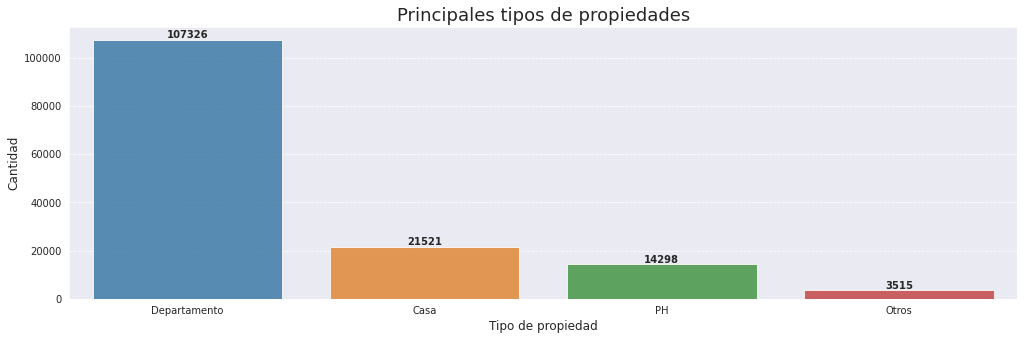

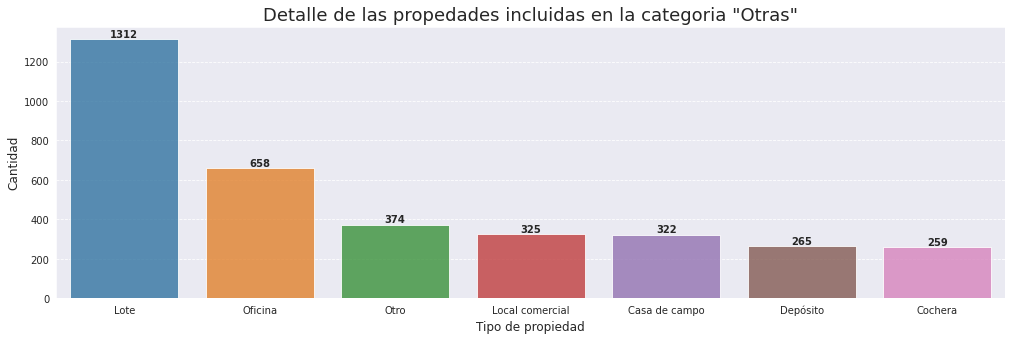

In [22]:
#Graficamos las los tres tipos de propiedades más importantes y unificamos el resto en la categoría "Otros".
df1 = df.copy()
df1.loc[~df1.property_type.isin(["Casa", "PH", "Departamento"]), "property_type"] = "Otros"

plt.figure(figsize=(17,5))
sns.countplot(data= df1,
                x= 'property_type',
             order = df1.loc[: , :].property_type.value_counts()[:].index,
             alpha=0.8)
plt.title('Principales tipos de propiedades',fontsize=18)
plt.ylabel('Cantidad',fontsize = 12)
plt.xlabel('Tipo de propiedad',fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
for i, v in enumerate(df1.loc[: , :].property_type.value_counts().to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom')
plt.show()

#Graficamos el detalle de los tipos de propiedades que se encuentran en "Otros".
plt.figure(figsize=(17,5))
sns.countplot(data= df,
                x= 'property_type',
             order = df.loc[: , :].property_type.value_counts()[3:].index,
             alpha=0.8)
plt.title('Detalle de las propedades incluidas en la categoria "Otras"',fontsize=18)
plt.ylabel('Cantidad', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
for i, v in enumerate(df.loc[: , :].property_type.value_counts()[3:].to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom')
plt.show()


#### 4. ¿De qué regiones son las publicaciones? 
Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [23]:
#se muestra la cantidad de barrios por zonas
df.groupby('l2')['l3'].nunique()


l2
Bs.As. G.B.A. Zona Norte    10
Bs.As. G.B.A. Zona Oeste     9
Bs.As. G.B.A. Zona Sur      13
Capital Federal             57
Name: l3, dtype: int64

podemos observar que el dataset está compuesto por 4 zonas, donde capital.

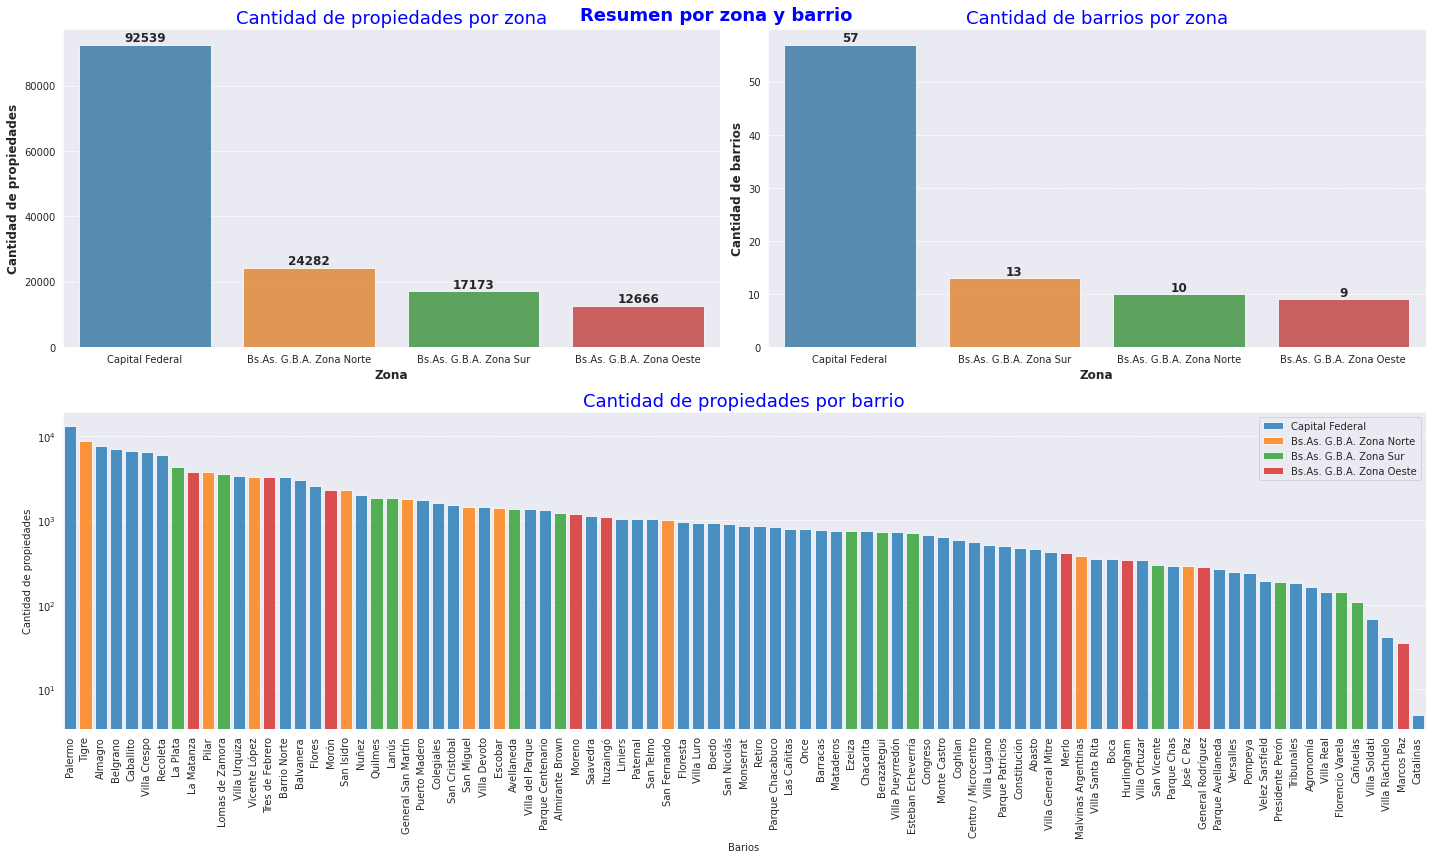

In [24]:
Colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ubicacion = df.loc[:].l2.value_counts().index


plt.figure(figsize=(20, 12))
plt.suptitle("Resumen por zona y barrio", fontsize=18, color="b", 
             horizontalalignment="center", fontweight ="bold", y =0.991)
G = gridspec.GridSpec(2 , 2)

#Graficamos la cantidad de propiedades por zona
axes_1 = plt.subplot(G[0, 0])
sns.countplot(x = "l2", data = df, order = df['l2'].value_counts().index, alpha=0.8)
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por zona", fontsize=18, color="b")
for i, v in enumerate(df.loc[: , :].l2.value_counts().to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom',fontsize = 12)
    
#Graficamos la cantidad de barrios por zona
axes_2 = plt.subplot(G[0, 1])
sns.barplot(x = df.groupby('l2')['l3'].nunique().index, 
            y = df.groupby('l2')['l3'].nunique(), order = df.groupby('l2')['l3'].nunique().sort_values(ascending=False).index, 
            alpha=0.8)
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de barrios", fontweight = "black", fontsize = 12)
plt.title("Cantidad de barrios por zona", fontsize=18, color="b")
for i, v in enumerate(df.groupby('l2')['l3'].nunique().sort_values(ascending=False).to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom',fontsize = 12)

#Graficamos la cantidad de propiedades por barrio
axes_3 = plt.subplot(G[1, :])
for i, v in enumerate(ubicacion):
    sns.countplot(data= df.loc[df.l2.isin([v]), :],
             x= 'l3',
             order = df.l3.value_counts().iloc[:].index,
             alpha=0.8,
             facecolor= Colores[i], 
             label= v)
plt.yscale("log")   
plt.title("Cantidad de propiedades por barrio", fontsize=18, color="b")
plt.xlabel('Barios')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.legend(loc = 1)

plt.tight_layout()
plt.show()

Se puede observar de los gráficos expresados anteriormente es que,

1. La región con más propiedades es "Capital Federal"
1. entre los 10 barrios más poblados 6 son de Capital Federal.


#### 5. **Filtrando el Dataset:** 
A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [25]:
print(df.property_type.value_counts().iloc[:3].index)
print(df.l2.value_counts().iloc[:1].index)

df1 = df.loc[df.property_type.isin(df.property_type.value_counts().iloc[:3].index) 
             & 
             df.l2.isin(df.l2.value_counts().iloc[:1].index)
             ,:]
df1.shape

Index(['Departamento', 'Casa', 'PH'], dtype='object')
Index(['Capital Federal'], dtype='object')


(91485, 19)

#### **Checkpoint:** 
deberías tener un dataset con 91485 instacias, 19 columnas.

#### 6. **Distribuciones y relaciones de a pares:** 
Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [26]:
df1.loc[:,'rooms':'price'].describe(percentiles = [.005, .25, .5, .7, 0.995])

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
0.5%,1.000000,0.000000,1.000000,23.000000,22.000000,5.200000e+04
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
70%,3.000000,2.000000,2.000000,100.000000,86.000000,2.500000e+05
99.5%,8.000000,6.000000,5.000000,550.000000,432.000000,2.169696e+06
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Con estos primeros estadísticos se observa que:
1. los valores mínimos obtenidos en las variables surface_total, surface_covered y price tienen poco sentido.
1. Se puede ver una gran dispersión en las variables surface_total, surface_covered y price.
1. los valores máximos en todas las variables son muy altos.

In [27]:
df1.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [28]:
#Eliminamos las instancias con valores nulos en las columnas "bathrooms", "surface_total" y "surface_covered".
df1 = df1.dropna(subset = ["bathrooms", "surface_total", "surface_covered"])
#Eliminamos eliminamos las instancias donde "surface_covered" es menor a "surface_total"
df1 =  df1[(df1.surface_total >= df1.surface_covered)]

In [29]:
df1 =  df1[(df1.surface_total >= df1.surface_covered)]

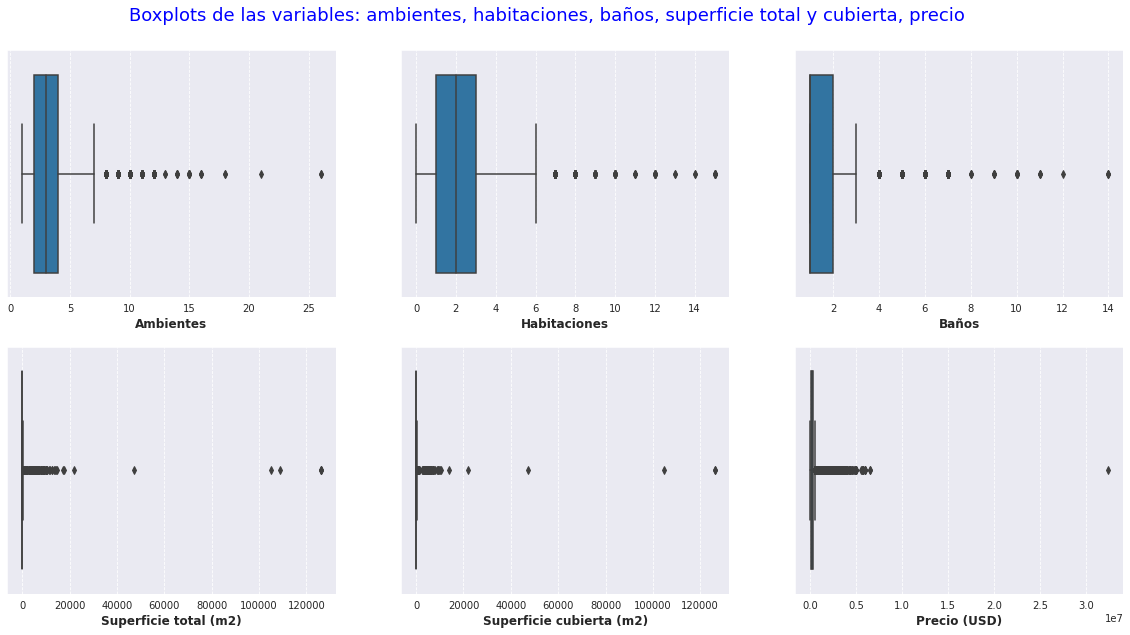

In [30]:
#Graficamos diagramas de caja para cada variable de interés.
plt.figure(figsize = (20,10))
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "b", y = 0.94)

plt.subplot(2,3,1)
sns.boxplot(x = df1.rooms, data= df1)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(x = df1.bedrooms, data= df1)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(x = df1.bathrooms, data= df1)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(x = df1.surface_total, data= df1)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(x = df1.surface_covered, data= df1)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(x = df1.price, data= df1)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)

plt.show()


In [31]:
#Filtramos las instancias con los valores más extremos, para apreciar mejor la distribución de las variables.

minimo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.995)
 
df1_limpio = df1[((df1[["rooms","bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] >= (minimo)) & (df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] <= (maximo))).all(axis=1)]


In [32]:
print("Tamaño del conjunto de datos filtrado:", df1_limpio.shape)

Tamaño del conjunto de datos filtrado: (78187, 19)


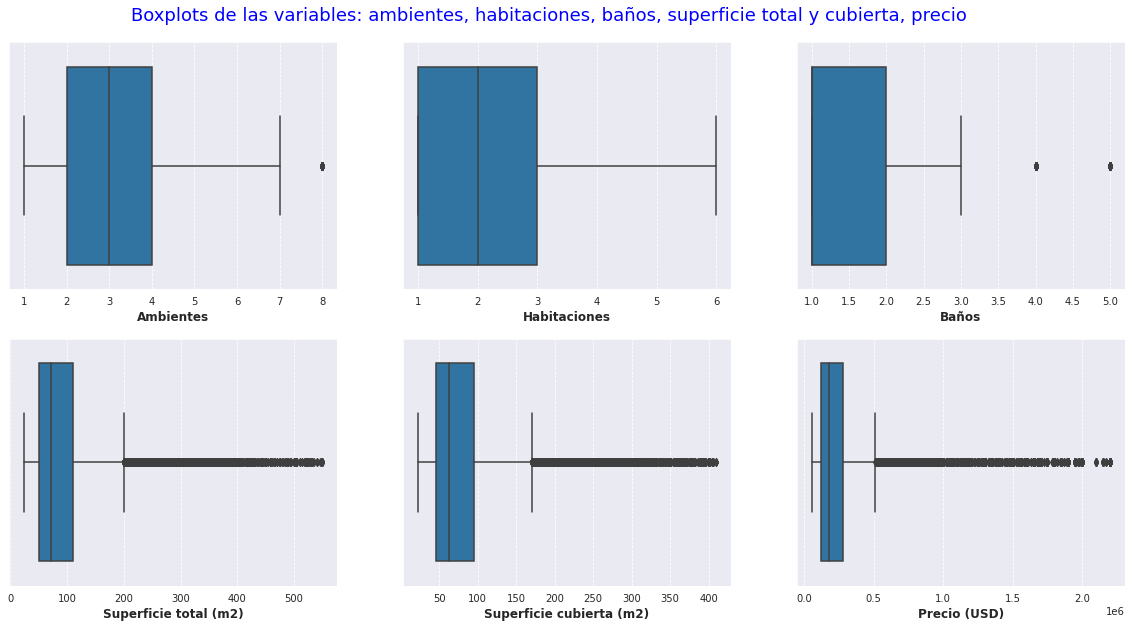

In [33]:
#Volvemos a realizar diagramas de caja para ver el cambio luego del filtrado
plt.figure(figsize = (20,10))
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "b", y = 0.93)

plt.subplot(2,3,1)
sns.boxplot(data = df1_limpio  ,x = "rooms")
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(data = df1_limpio  ,x = 'bedrooms')
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(data = df1_limpio  ,x = 'bathrooms')
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(data = df1_limpio  ,x = 'surface_total')
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(data = df1_limpio  ,x = 'surface_covered')
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(data = df1_limpio  ,x = 'price')
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)
plt.show()

De esta manera podemos observar mejor la distribucion del dataset.

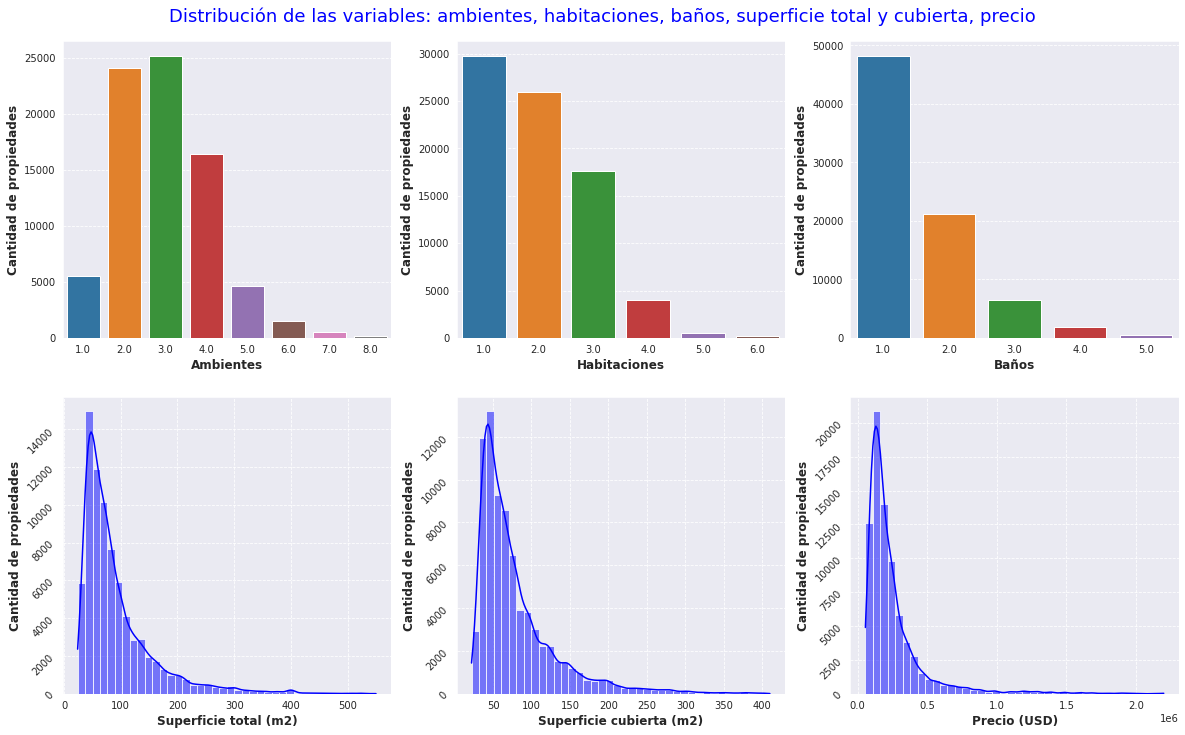

In [34]:
#Realizamos unos gráficos de barra para las variables discretas e histogramas para las continuas.
plt.figure(figsize = (20,12))
plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "b", y = 0.92)

plt.subplot(2,3,1)
sns.countplot(x = df1_limpio.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(x = df1_limpio.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.countplot(x = df1_limpio.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.histplot(x = df1_limpio.surface_total, bins = 40,color="b", label = 'train', kde=True)
plt.yticks(rotation = 45)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.histplot(x = df1_limpio.surface_covered, bins = 40,color="b", label = 'train', kde=True)
plt.yticks(rotation = 45)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.histplot(x = df1_limpio.price, bins = 40,color="b", label = 'train', kde=True)
plt.yticks(rotation = 45)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.show()

Podemos observar que la mayoría de valores en todas las variables se encuentran distribuidos en los valores más bajo, y que a medida que nos desplazamos hacia la izquierda de las gráficas la frecuencia disminuye.

In [35]:
#Realizamos un pairplot para poder ver los diagramas de dispersión entre las variables numéricas.
sns.pairplot(df1_limpio, hue = 'property_type')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2df3ea0ef0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f2df2d9dd40> (for post_execute):


KeyboardInterrupt: ignored

Se decidió graficar la variable de interés del proyecto en relación al resto, diferenciando el tipo de propiedad

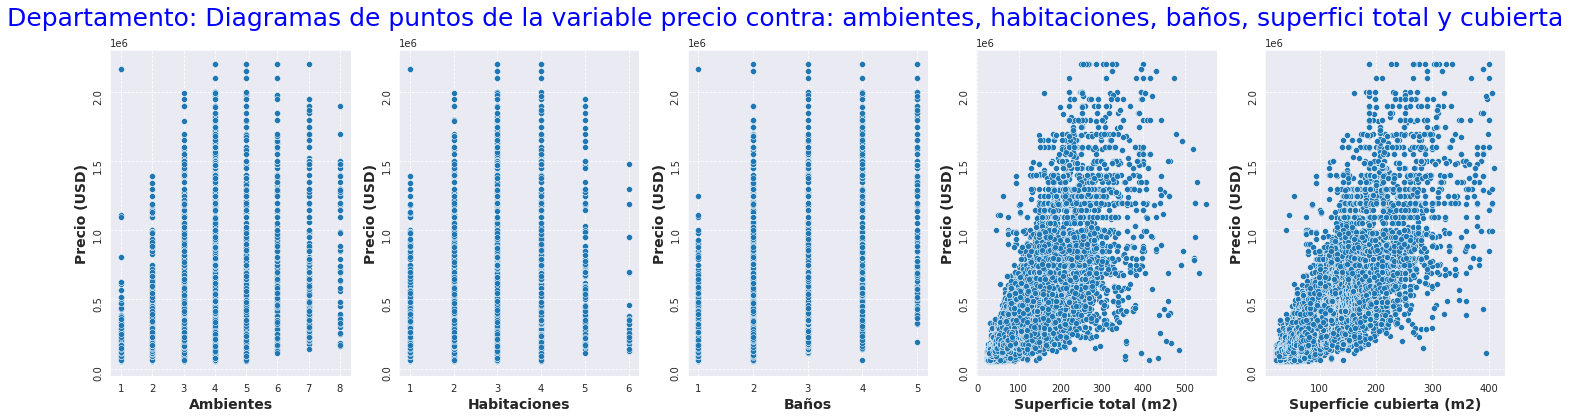

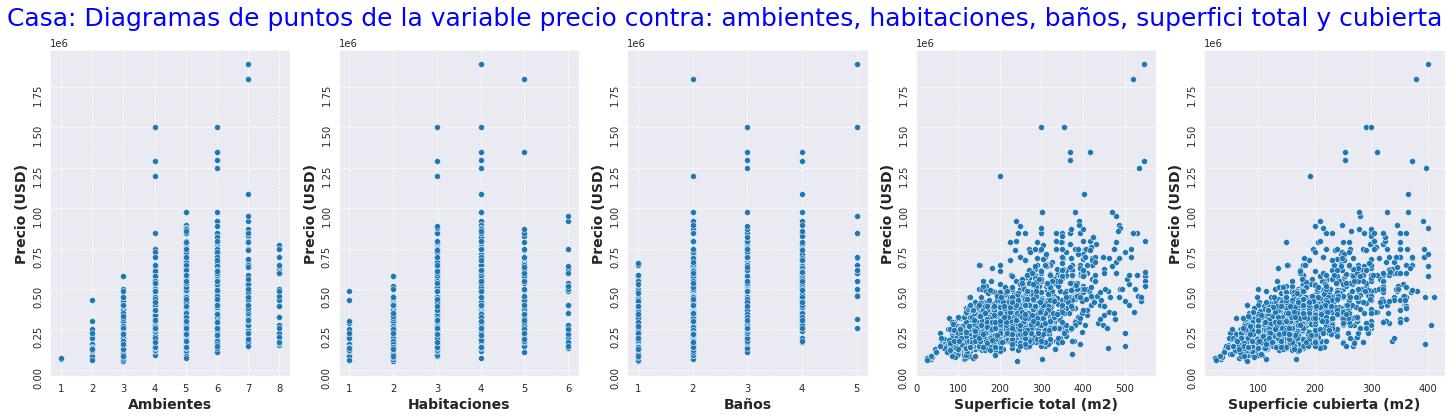

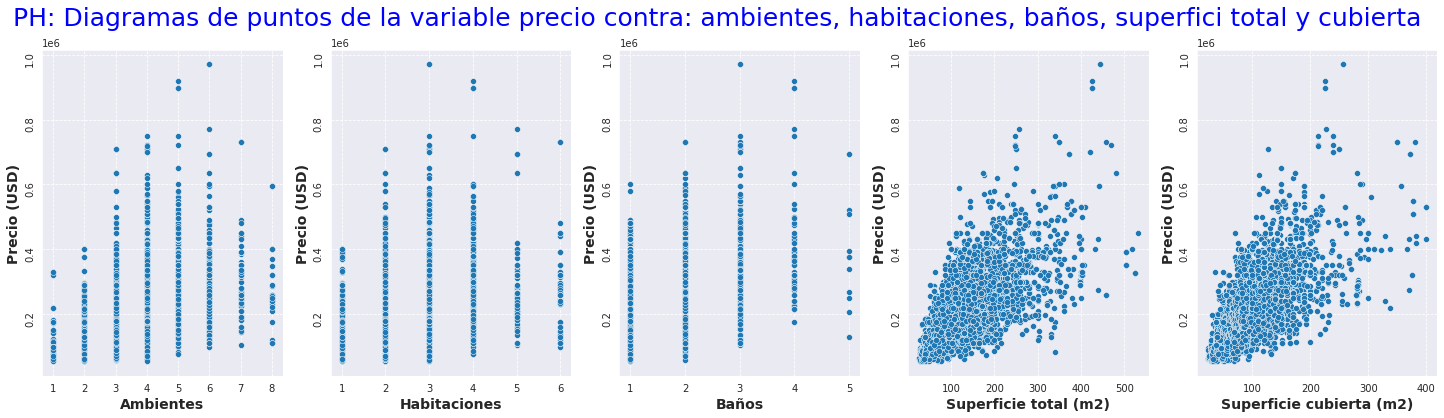

In [36]:
tipos = ["Departamento","Casa" , "PH"]
for i in tipos:
    plt.figure(figsize = (25,6))
    plt.suptitle(f"{i}: Diagramas de puntos de la variable precio contra: ambientes, habitaciones, baños, superfici total y cubierta", fontsize=25, color = "b")

    plt.subplot(1,5,1)
    sns.scatterplot(x = df1_limpio[(df1_limpio.property_type == i)].rooms, y = df1_limpio[(df1_limpio.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Ambientes", fontweight = "black", fontsize = 14)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 14)

    plt.subplot(1,5,2)
    sns.scatterplot(x = df1_limpio[(df1_limpio.property_type == i)].bedrooms, y = df1_limpio[(df1_limpio.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Habitaciones", fontweight = "black", fontsize = 14)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 14)

    plt.subplot(1,5,3)
    sns.scatterplot(x = df1_limpio[(df1_limpio.property_type == i)].bathrooms, y = df1_limpio[(df1_limpio.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Baños", fontweight = "black", fontsize = 14)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 14)

    plt.subplot(1,5,4)
    sns.scatterplot( x = df1_limpio[(df1_limpio.property_type == i)].surface_total, y =  df1_limpio[(df1_limpio.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 14)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 14)
    
    plt.subplot(1,5,5)
    sns.scatterplot( x = df1_limpio[(df1_limpio.property_type == i)].surface_covered, y = df1_limpio[(df1_limpio.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 14)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 14)
    plt.show()

Se puede observar que las variables "Superficie total" y "Superficie cubierta" en los tres tipos de propiedades tienen una correlación lineal positiva.
En cambio, en las variables "Ambientes", "Habitaciones" y "Baños" no se puede observar una relación clara.

#### 7. **Correlaciones:** 
Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

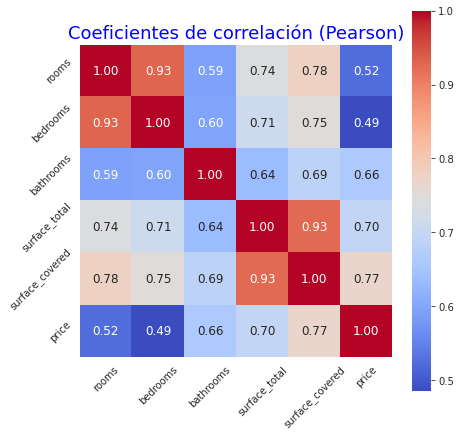

In [37]:
plt.figure(figsize = (7,7))
sns.heatmap(df1_limpio.loc[:,'rooms':'price'].corr(),
            cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "b", y = 1.1)
plt.show()

Podemos observar que las variables  que todas las variables tienen un coeficiente de correlación entre el rango de 0,49 y 0.77, donde las variables con mayor correlación son "Superficie cubierta", "Superficie total".

Se puede observar una fuerte con relación entre "Superficie cubierta" y "Superficie total, además de, "Ambientes" y "Habitaciones", lo que era de sumoner.


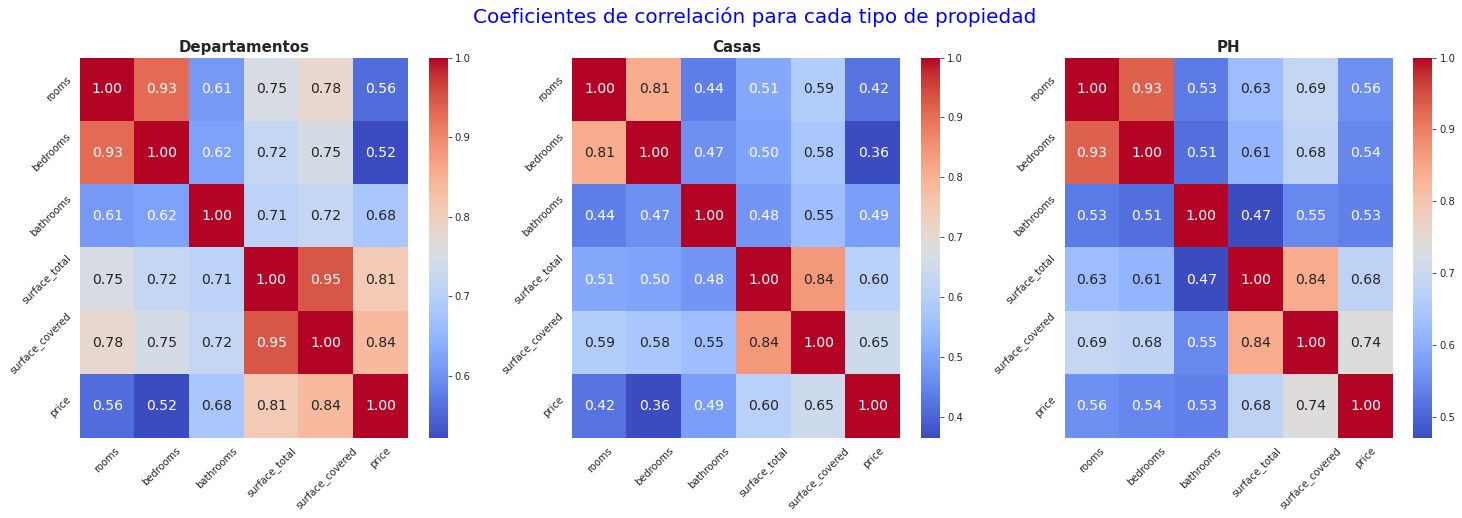

In [38]:
# Analizamos por cada tipo de propiedad por separado.


corr_casa = df1_limpio.loc[df1_limpio.property_type == "Casa", 'rooms':'price'].corr()
corr_depto = df1_limpio.loc[df1_limpio.property_type == "Departamento", 'rooms':'price'].corr()
corr_ph = df1_limpio.loc[df1_limpio.property_type == "PH", 'rooms':'price'].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "b")

plt.subplot(1,3,1)
sns.heatmap(corr_depto, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Departamentos", fontweight = "black", fontsize = 15)

plt.subplot(1,3,2)
sns.heatmap(corr_casa, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Casas", fontweight = "black", fontsize = 15)

plt.subplot(1,3,3)
sns.heatmap(corr_ph, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("PH", fontweight = "black", fontsize = 15)
plt.show()

 * Para el caso de los **departamento** podemos observar un leve incremento en los valores de correlación respecto al precio respecto a la correlaciones obtenida anteriormente.
 * los **PH** mantienen valores muy precocidos.
 * En el caso de las **casa** se observa una disminución en los valores de correlación.


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


#### 1. ¿Cuál es el barrio más costoso de CABA?

Para esto utilizaremos el dataset obtenido en el Checkpoint anterior y eliminamos los valores más extremos.

Para obtener el barrio más costoso de Capital Federal primero calculamos el precio por m2 cuadrado en cada instancia. 

In [39]:
df = pd.read_csv('/content/gdrive/MyDrive/datos/DS_Proyecto_01_Datos_Properati.csv')

In [40]:
df1 = df.loc[df.property_type.isin(df.property_type.value_counts().iloc[:3].index) 
             & 
             df.l2.isin(df.l2.value_counts().iloc[:1].index)
             ,:]

minimo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.9)
 
df1_limpio = df1[((df1[["rooms","bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] >= (minimo)) & (df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] <= (maximo))).all(axis=1)]
df_desafio =  df1_limpio[[ 'l1', 'l2','l3', 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio = df_desafio.dropna()

In [41]:
df_desafio["Precio_m2"] = df_desafio["price"] / df_desafio["surface_covered"]

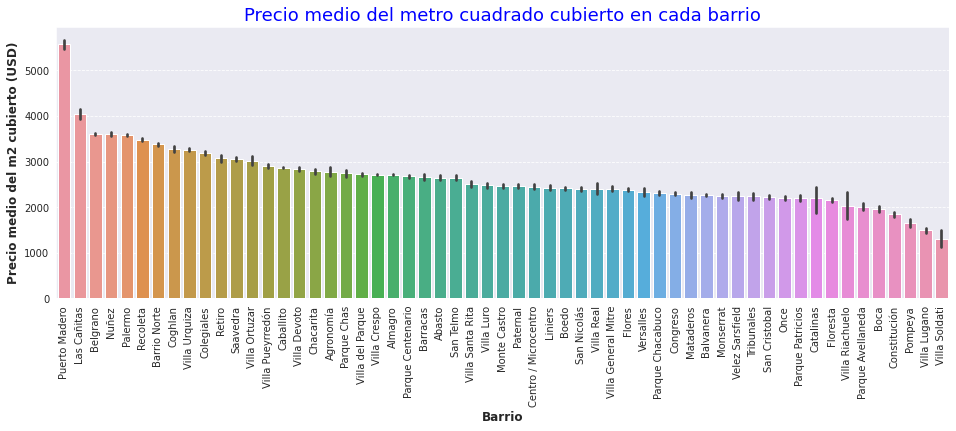

In [42]:
orden = df_desafio.groupby(["l3"])['Precio_m2'].aggregate(np.mean).reset_index().sort_values('Precio_m2', ascending=False)

plt.figure(figsize = (16,5))

sns.barplot(x = df_desafio.l3, y = df_desafio.Precio_m2, order = orden["l3"])
plt.xticks(rotation = 90)
plt.xlabel("Barrio", fontweight = "black", fontsize = 12)
plt.ylabel("Precio medio del m2 cubierto (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio del metro cuadrado cubierto en cada barrio", fontsize=18, color="b")
plt.show()

Podemos observar que el Barrio más costoso es **Puerto Madero**, donde el valor del m2 está muy cercano al doble de la media de todos los barrios.

#### 2. ¿Varia el valor del m2 en función de la cantidad de ambientes?

Para responder esta pregunta usaremos solo el barrio de Palermo, ya que es el que más instancias tiene.

In [43]:
df1 = df.loc[df.property_type.isin(df.property_type.value_counts().iloc[:3].index) 
             & 
             df.l3.isin(["Palermo"])
             ,:]

minimo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].quantile (0.995)
 
df1_limpio = df1[((df1[["rooms","bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] >= (minimo)) & (df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]] <= (maximo))).all(axis=1)]
df_desafio =  df1_limpio[[ 'l1', 'l2','l3',"rooms", 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio = df_desafio.dropna()

In [44]:
df_desafio["Precio_m2"] = df_desafio["price"] / df_desafio["surface_covered"]

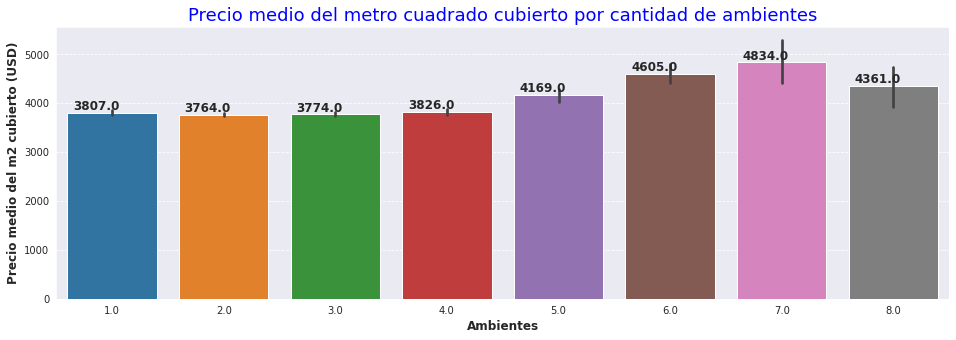

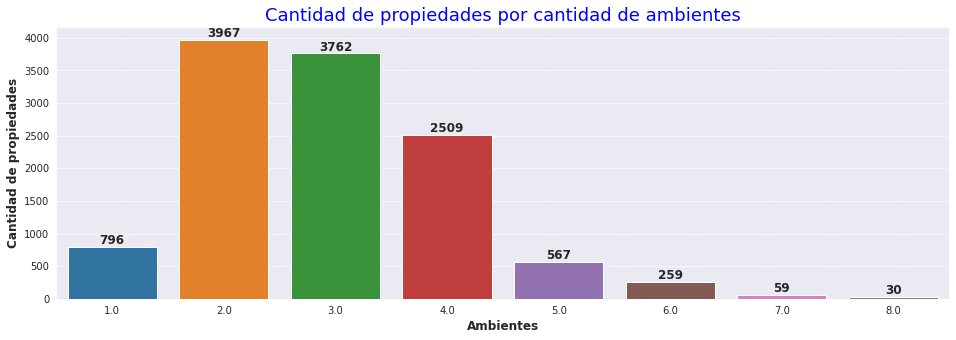

In [45]:
orden = df_desafio.groupby(["rooms"])['Precio_m2'].aggregate(np.mean).reset_index()#.sort_values('Precio_m2', ascending=False)
orden = orden.round({"Precio_m2": 0})

plt.figure(figsize = (16,5))


sns.barplot(x = df_desafio.rooms, y = df_desafio.Precio_m2, order = orden["rooms"])
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Precio medio del m2 cubierto (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio del metro cuadrado cubierto por cantidad de ambientes", fontsize=18, color="b")
for i, v in enumerate(orden["Precio_m2"].to_numpy()):
    plt.text(i-0.35, v, str(v), fontweight='bold', va='bottom',fontsize = 12)

plt.show()

df_desafio["Cuenta"] = 1
orden = df_desafio.groupby(["rooms"])["Cuenta"].aggregate(np.sum).reset_index()#.sort_values('Precio_m2', ascending=False)

plt.figure(figsize = (16,5))
sns.countplot(x = df_desafio.rooms)#, y = df_desafio.Precio_m2)#, order = orden["rooms"])
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cantidad de ambientes", fontsize=18, color="b")
for i, v in enumerate(orden["Cuenta"].to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom',fontsize = 12)

plt.show()

Podemos observar del grafico anterior, el valor por m2 no se ve influenciado de 1 a 4 ambientes, debido a que no hay una variación significativa entre los valores, partir de 5 ambiente se aprecia una tendencia creciente, a exención de 8 ambientes, esto puede deberse baja cantidad de instancias para ese valor de habitaciones.

#### 3. ¿Cuál es la capital con el metro cuadrado más costoso en Sudamérica?

Compararemos los precios de las capitales Argentina, Uruguay, Colombia, Ecuador y Perú

Para esta última pregunta descargamos los dataset que podemos encontrar en la página de Properati https://www.properati.com.ar/data

In [46]:
# df_desafio_ar = pd.read_csv('datos/ar_properties.csv')
# df_desafio_uy = pd.read_csv('datos/uy_properties.csv')
# df_desafio_co = pd.read_csv('datos/co_properties.csv')
# df_desafio_ec = pd.read_csv('datos/ec_properties.csv')
# df_desafio_pe = pd.read_csv('datos/pe_properties.csv')

df_desafio_ar = pd.read_csv('/content/gdrive/MyDrive/datos/ar_properties.csv')
df_desafio_uy = pd.read_csv('/content/gdrive/MyDrive/datos/uy_properties.csv')
df_desafio_co = pd.read_csv('/content/gdrive/MyDrive/datos/co_properties.csv')
df_desafio_ec = pd.read_csv('/content/gdrive/MyDrive/datos/ec_properties.csv')
df_desafio_pe = pd.read_csv('/content/gdrive/MyDrive/datos/pe_properties.csv')

In [47]:
# df_desafio_ar.head()
# df_desafio_uy.head()
# df_desafio_co.head()
# df_desafio_ec.shape
# df_desafio_pe.shape

In [48]:
df_desafio_co.operation_type.value_counts()

Venta                567525
Arriendo             432166
Arriendo temporal       309
Name: operation_type, dtype: int64

In [49]:
df_desafio_ar = df_desafio_ar.loc[(df_desafio_ar.l2 == 'Capital Federal') & 
                                  ((df_desafio_ar.property_type == 'Casa')|(df_desafio_ar.property_type == 'Departamento')) & 
                                  (df_desafio_ar.operation_type == "Venta")]

df_desafio_uy = df_desafio_uy.loc[(df_desafio_uy.l2 == 'Montevideo') & 
                                  ((df_desafio_uy.property_type == 'Casa')|(df_desafio_uy.property_type == 'Departamento')) & 
                                  (df_desafio_uy.operation_type == "Venta")]

df_desafio_co = df_desafio_co.loc[(df_desafio_co.l3 == 'Bogotá D.C') & 
                                  ((df_desafio_co.property_type == 'Casa')|(df_desafio_co.property_type == 'Apartamento')) & 
                                  (df_desafio_co.operation_type == "Venta")]

df_desafio_ec = df_desafio_ec.loc[(df_desafio_ec.l3 == 'Quito') & 
                                  ((df_desafio_ec.property_type == 'Casa')|(df_desafio_ec.property_type == 'Departamento')) & 
                                  (df_desafio_ec.operation_type == "Venta")]

df_desafio_pe = df_desafio_pe.loc[(df_desafio_pe.l3 == 'Lima') & 
                                  ((df_desafio_pe.property_type == 'Casa')|(df_desafio_pe.property_type == 'Departamento')) & 
                                  (df_desafio_pe.operation_type == "Venta")]



In [50]:
df_desafio_ar['Capital'] = df_desafio_ar.l2
df_desafio_uy['Capital'] = df_desafio_uy.l2
df_desafio_co['Capital'] = df_desafio_co.l3
df_desafio_ec['Capital'] = df_desafio_ec.l3
df_desafio_pe['Capital'] = df_desafio_pe.l3

df_desafio_ar['Barrio'] = df_desafio_ar.l3
df_desafio_uy['Barrio'] = df_desafio_uy.l3
df_desafio_co['Barrio'] = df_desafio_co.l4
df_desafio_ec['Barrio'] = df_desafio_ec.l4
df_desafio_pe['Barrio'] = df_desafio_pe.l4

In [51]:
df_desafio_ar_final =  df_desafio_ar[[ 'l1', 'Capital','Barrio', 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio_uy_final =  df_desafio_uy[[ 'l1', 'Capital','Barrio', 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio_co_final =  df_desafio_co[[ 'l1', 'Capital','Barrio', 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio_ec_final =  df_desafio_ec[[ 'l1', 'Capital','Barrio', 'surface_covered','surface_total', 'property_type', 'price']]
df_desafio_pe_final =  df_desafio_pe[[ 'l1', 'Capital','Barrio', 'surface_covered','surface_total', 'property_type', 'price']]

In [52]:
frames = [df_desafio_ar_final, df_desafio_uy_final, df_desafio_co_final, df_desafio_ec_final, df_desafio_pe_final]

#Argentina
minimo = df_desafio_ar_final[["surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df_desafio_ar_final[["surface_total", "surface_covered", "price"]].quantile (0.995)
    
df_desafio_ar_final = df_desafio_ar_final[~((df_desafio_ar_final[["surface_total", "surface_covered", "price"]] < (minimo)) | (df_desafio_ar_final[["surface_total", "surface_covered", "price"]] > (maximo))).any(axis=1)]
#Uruguay
minimo = df_desafio_uy_final[["surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df_desafio_uy_final[["surface_total", "surface_covered", "price"]].quantile (0.995)
    
df_desafio_uy_final = df_desafio_uy_final[~((df_desafio_uy_final[["surface_total", "surface_covered", "price"]] < (minimo)) | (df_desafio_uy_final[["surface_total", "surface_covered", "price"]] > (maximo))).any(axis=1)]
#Colombia
minimo = df_desafio_co_final[["surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df_desafio_co_final[["surface_total", "surface_covered", "price"]].quantile (0.995)
    
df_desafio_co_final = df_desafio_co_final[~((df_desafio_co_final[["surface_total", "surface_covered", "price"]] < (minimo)) | (df_desafio_co_final[["surface_total", "surface_covered", "price"]] > (maximo))).any(axis=1)]
#Ecuador
minimo = df_desafio_ec_final[["surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df_desafio_ec_final[["surface_total", "surface_covered", "price"]].quantile (0.995)
    
df_desafio_ec_final = df_desafio_ec_final[~((df_desafio_ec_final[["surface_total", "surface_covered", "price"]] < (minimo)) | (df_desafio_ec_final[["surface_total", "surface_covered", "price"]] > (maximo))).any(axis=1)]
#Peru
minimo = df_desafio_pe_final[["surface_total", "surface_covered", "price"]].quantile (0.005)
maximo = df_desafio_pe_final[["surface_total", "surface_covered", "price"]].quantile (0.995)
    
df_desafio_pe_final = df_desafio_pe_final[~((df_desafio_pe_final[["surface_total", "surface_covered", "price"]] < (minimo)) | (df_desafio_pe_final[["surface_total", "surface_covered", "price"]] > (maximo))).any(axis=1)]


In [53]:
## el precio en Colombia esta expresado en peso, lo transformamos a dólar

df_desafio_co_final = df_desafio_co_final.dropna()

df_desafio_co_final["price"] = df_desafio_co_final["price"].div(3700)

##https://dolar.wilkinsonpc.com.co/dolar-historico/dolar-historico-2020.html

In [54]:
frames = [df_desafio_ar_final, df_desafio_uy_final, df_desafio_co_final, df_desafio_ec_final, df_desafio_pe_final]

df_desafio_union = pd.concat(frames)

In [55]:
df_desafio_union.rename(columns={'l1':'Pais'},
               inplace=True)
# df_desafio_co.property_type.map({'Apartamento':'Departamento',  'Casa' : 'Casa'}, na_action = 'ignore')
df_desafio_union.loc[ df_desafio_union.property_type == 'Apartamento', 'property_type'] = 'Departamento'

In [56]:
df_desafio_union.isnull().sum()


Pais                    0
Capital                 0
Barrio               6593
surface_covered    128904
surface_total      133127
property_type           0
price                2465
dtype: int64

In [57]:
df_desafio_union = df_desafio_union.dropna()

In [58]:
df_desafio_union["Precio_m2"] = df_desafio_union["price"] / df_desafio_union["surface_covered"]

In [59]:
df_desafio_union.head()

,Pais,Capital,Barrio,surface_covered,surface_total,property_type,price,Precio_m2
240,Argentina,Capital Federal,Recoleta,51.0,51.0,Departamento,139000.0,2725.490196
272,Argentina,Capital Federal,Retiro,33.0,35.0,Departamento,66000.0,2000.000000
275,Argentina,Capital Federal,Palermo,22.0,22.0,Departamento,88000.0,4000.000000
279,Argentina,Capital Federal,Recoleta,23.0,23.0,Departamento,115000.0,5000.000000
281,Argentina,Capital Federal,Caballito,48.0,48.0,Departamento,100000.0,2083.333333


In [60]:
df_desafio_union.describe()

,surface_covered,surface_total,price,Precio_m2
count,104223.000000,104223.000000,1.042230e+05,104223.000000
mean,87.075195,98.068152,2.458468e+05,2863.183623
std,87.755095,105.721212,2.729137e+05,1259.095583
min,20.000000,21.000000,2.348649e+04,25.132743
25%,41.000000,45.000000,1.050000e+05,2096.774194
50%,60.000000,68.000000,1.580000e+05,2692.307692
75%,99.000000,110.000000,2.700000e+05,3363.636364
max,5650.000000,6650.000000,2.600000e+06,31666.666667


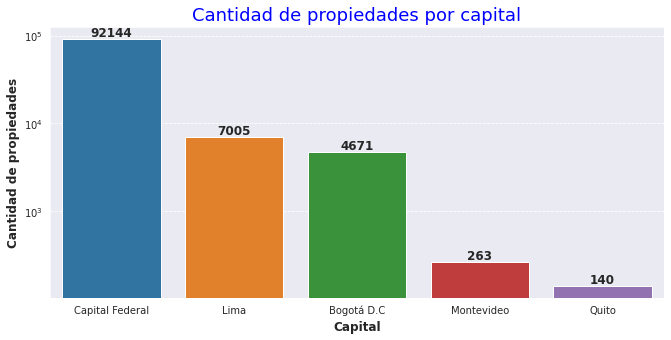

In [61]:
plt.figure(figsize = (11,5))

sns.countplot(x = df_desafio_union['Capital'], ##hue = df_desafio_union["property_type"],
             order = df_desafio_union.Capital.value_counts().index)
plt.yscale("log")
plt.xlabel("Capital", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por capital", fontsize=18, color="b")
for i, v in enumerate(df_desafio_union.Capital.value_counts().to_numpy()):
    plt.text(i, v, str(v), fontweight='bold',ha='center', va='bottom',fontsize = 12)

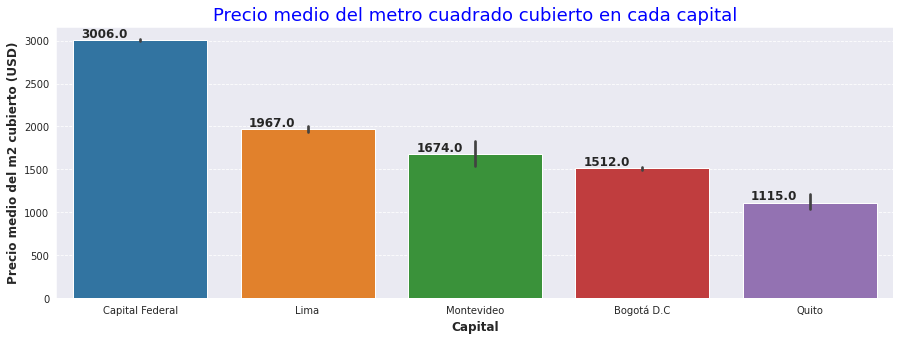

In [62]:
# orden = df_desafio_union.loc[(df_desafio_union.Pais == "Uruguay")].groupby(["Barrio"])['Precio_m2'].aggregate(np.mean).reset_index().sort_values('Precio_m2', ascending=False)
orden = df_desafio_union.groupby(["Capital"])['Precio_m2'].aggregate(np.mean).reset_index().sort_values('Precio_m2', ascending=False)
orden = orden.round({"Precio_m2": 0})
plt.figure(figsize = (15,5))

sns.barplot(x = 'Capital', y =  'Precio_m2', data = df_desafio_union, order = orden["Capital"])
# plt.xticks(rotation = 0)
plt.xlabel("Capital", fontweight = "black", fontsize = 12)
plt.ylabel("Precio medio del m2 cubierto (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio del metro cuadrado cubierto en cada capital", fontsize=18, color="b")
for i, v in enumerate(orden["Precio_m2"].to_numpy()):
    plt.text(i-0.35, v, str(v), fontweight='bold', va='bottom',fontsize = 12)
plt.show()


En función de los datos obtenidos de **Properati**, la capital, de los países estudiados, con el m2 más costoso es "Capital Federal"  

Comparando los valores obtenidos del precio por m2 de las capitales de cada país estudiado, con lo reportado en el siguiente link https://www.lavoz.com.ar/negocios/cordoba-en-podio-latinoamericano-de-ciudades-donde-mas-cayo-precio-de-inmuebles/.

Observamos que los valores de Argentina, Perú, ecuador, Colombia están muy parecidos.
En cambio Uruguay difieren un poco del valor reportado. esto puede deberse a que es uno de los países con la menor cantidad de datos.


Hay que tener en cuenta que lo resultados obtenidos pueden diferir de los de la realizad actual, ya que los datos son antiguos.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

#### **Checkpoint ML:** 
deberías obtener un dataset con 81019 instacias y 6 columnas.

In [63]:
df_ml = df.loc[(df.l2 == 'Capital Federal') 
            & ((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento')) 
            & (df.surface_total <= 1000) & (df.surface_total >= 15) & (df.price <= 4000000),
              'rooms':'price']
df_ml = df_ml.dropna()

In [64]:
df_ml.shape

(81019, 6)

In [65]:
df_ml.loc[:,'rooms':'price'].describe(percentiles = [.005, .25, .5, .7, 0.995])

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
0.5%,1.000000,1.000000,1.000000,24.000000,22.000000,5.500000e+04
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
70%,4.000000,2.000000,2.000000,100.000000,86.000000,2.550000e+05
99.5%,8.000000,6.000000,5.000000,500.000000,402.910000,2.200000e+06
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


Cargamos las librerias necesarias

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


#### 1. benchmark

Para realizar nuestro modelo benchmark, utilizaremos **"surface_total", "surface_covered"**, las cuales fueron las dos variables que mayor correlación tuvieron con la variable respuesta **"Price"**.

In [67]:
X_bm = df_ml[["surface_total", "surface_covered"]]
y_bm = df_ml["price"]

Se decide reservar el 30% de los datos para testear el modelo.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_bm, y_bm, test_size = 0.3, random_state = 42)

Como modelo de regresion utilizamos Arbol de decicion, con una profundidad maxima de 8.

In [69]:
linear_bm = LinearRegression()
type(linear_bm)

sklearn.linear_model._base.LinearRegression

In [70]:
linear_bm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_test_pred = linear_bm.predict(X_test)
y_train_pred = linear_bm.predict(X_train)

Para evaluar el modelo se decidió utilizar el RMSE, junto con el R2.

Se decide no utilizar el R2 ajustado ya que la cantidad de variables no hacen una diferencia significativa en el resultado.

In [72]:
#RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

#r_squared
yhat = linear_bm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared_train = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f'R2 en Train: {r_squared_train}')#, " ",f'R2 ajustado en Train: {adjusted_r_squared}')
#adjusted_r_squared
yhat = linear_bm.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared_test = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'R2 en Test: {r_squared_test}')#, " ",f'R2 ajustado en Test: {adjusted_r_squared}')

Raíz del error cuadrático medio en Train: 216278.7175940256
Raíz del error cuadrático medio en Test: 218957.05421795268
R2 en Train: 0.47149901352069057
R2 en Test: 0.4753609350566953


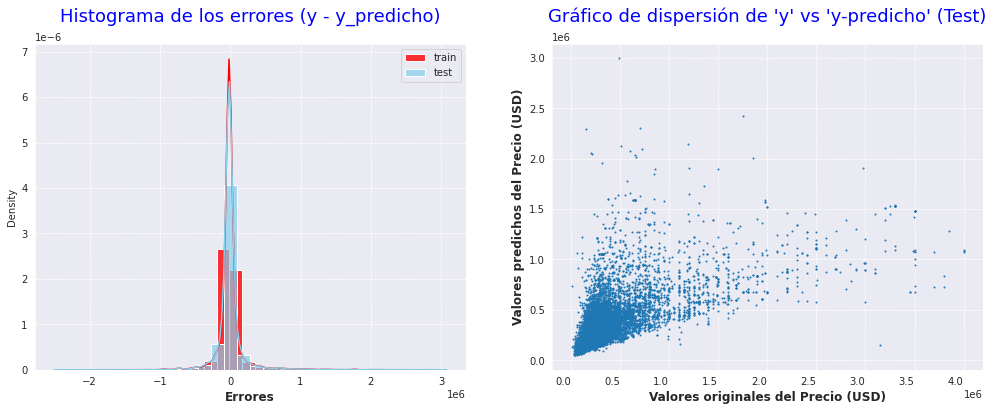

In [73]:

plt.figure(figsize = (17,6))

# plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r", y = 0.96)
G = gridspec.GridSpec(1 , 2)
axes_1 = plt.subplot(G[0, 0])
# plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 30,color="red", label = 'train',stat = 'density', kde=True, alpha=0.8)
sns.histplot(y_test - y_test_pred, bins = 30,color="skyblue", label = 'test',stat = 'density', kde=True, alpha=0.7)
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
plt.xticks(rotation = 0)
plt.legend()
axes_1 = plt.subplot(G[0, 1])
# plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 0, horizontalalignment="right")
plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b", y = 1.05)
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)

plt.show() 

Almacenamos macenamos el resultado del modelo bechnmark un dataframe:

In [74]:
df_bechnmark = pd.DataFrame({ "Descripción":"Benchmar",
                              "Modelo": "LinearRegression", 
                              "Hparam": "",
                              "Cant_Var": "2",
                              "rmse_train": [rmse_train],
                              "rmse_test": [rmse_test],
                              "R2_train": [r_squared_train],
                              "R2_test":  [r_squared_test]})
df_bechnmark

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361


#### Funciones

##### Función para crear y evaluar los modelos.

In [75]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, 
                   
                   modelo, descrip = "", Hparam ="", Cant_Var = "",#modelo ya creado
                   
#                    tree_regressor = False,max_depth=3, #Arbol de decisión  
#                    knn_regressor = False, n_neighbors=5, #Vecino más cercano
                   
                   importances = False): #calculó la importancia de cada variable en el modelo (Arbol)


#     if tree_regressor == True and knn_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         model_knn_regressor = KNeighborsRegressor(n_neighbors=5)
#         models = [model_tree_regressor, model_knn_regressor]
#     elif tree_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         models = [model_tree_regressor]
        
#     elif knn_regressor == True:
#         model_knn_regressor = KNeighborsRegressor(n_neighbors= n_neighbors)
#         models = [model_knn_regressor]
#     else:
#         models = []
        
        
#     for i, modelo in enumerate(models):

        if type(modelo).__name__ == 'DecisionTreeRegressor':
            print('Modelo: Árbol de Decisión')
            modelos = "Árbol"       
            Hparam = "Profundidad " +str(Hparam)

        elif type(modelo).__name__ == 'KNeighborsRegressor':    
            print('Modelo: Vecinos más cercanos')
            Hparam = str(Hparam) +" Vecinos"
            modelos = "KNN"
            
        modelo.fit(X_train, y_train)
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

        yhat = modelo.predict(X_train)
        SS_Residual = sum((y_train-yhat)**2)       
        SS_Total = sum((y_train-np.mean(y_train))**2)     
        r_squared_train = 1 - (float(SS_Residual))/SS_Total
        print(f'R 2 en Train: {r_squared_train}')


        yhat = modelo.predict(X_test)
        SS_Residual = sum((y_test-yhat)**2)       
        SS_Total = sum((y_test-np.mean(y_test))**2)     
        r_squared_test = 1 - (float(SS_Residual))/SS_Total
        print(f'R 2 en Test: {r_squared_test}')

    #     if type(modelo).__name__ == 'DecisionTreeRegressor':
        plt.figure(figsize = (17,11))
        G = gridspec.GridSpec(2 , 2)
    #     else:
    #         plt.figure(figsize = (17,11))
    #         G = gridspec.GridSpec(1 , 2)
    #     plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")
        G = gridspec.GridSpec(2 , 2)

        axes_1 = plt.subplot(G[0, 0])
    #     plt.subplot(1,3,1)
        sns.histplot(y_train - y_train_pred, bins = 30,color="red", label = 'train',stat = 'density', kde=True, alpha=0.8)
        sns.histplot(y_test - y_test_pred, bins = 30,color="skyblue", label = 'test',stat = 'density', kde=True, alpha=0.8)
        plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Errores", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
        plt.legend()
    #     plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)

        axes_1 = plt.subplot(G[0, 1])
    #     plt.subplot(1,3,2)
        plt.scatter(x = y_test, y = y_test_pred, s=1) 
        plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
    #     plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b", y = 1.05)

        if type(modelo).__name__ == 'DecisionTreeRegressor' and importances == True:
            axes_1 = plt.subplot(G[1, :])
    #     plt.subplot(1,2,3)
            importances = modelo.feature_importances_
            columns = X_train.columns

            sns.barplot(x = columns, y = importances, alpha=0.8)
            plt.xlabel("Variables", fontweight = "black", fontsize = 12)
            plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
        plt.show()    

        
        df = pd.DataFrame({ "Descripción":[descrip],
                                      "Modelo": [modelos], 
                                      "Hparam": [Hparam],
                                      "Cant_Var": [Cant_Var],
                                      "rmse_train": [rmse_train],
                                      "rmse_test": [rmse_test],
                                      "R2_train": [r_squared_train],
                                      "R2_test":  [r_squared_test]})
        return df        

##### Función para probar los modelos.

In [76]:
def probar_modelos(X_train, X_test, y_train, y_test,
                   tree_regressor = False, knn_regressor =False, 
                   depth_o_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25]):

    
    if tree_regressor == True and knn_regressor == True:
        modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
#         models = [model_tree_regressor, model_knn_regressor]
    elif tree_regressor == True:
        modelos = ['Árbol de Decisión']       
#         models = [model_tree_regressor]
        
    elif knn_regressor == True:
        modelos = ['Vecinos más cercanos']
#         models = [model_knn_regressor]
    else:
        modelos = []
        
        
    for i, modelo in enumerate(modelos):
        print(f'Modelo: {modelos[i]}')

        lista_rmse_train = []
        lista_rmse_test = []
        lista_r2_train = []
        lista_r2_test = []
        lista_r2a_train = []
        lista_r2a_test = []

        

        for i in depth_o_neighbors:
            
            if modelo == 'Árbol de Decisión':
                model = DecisionTreeRegressor(max_depth = i, random_state=42)
            else: #modelos == 'Árbol de Decisión':
                model = KNeighborsRegressor(n_neighbors = i)
                  
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            y_test_pred = model.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            lista_rmse_train.append(train_rmse)
            lista_rmse_test.append(test_rmse)
            yhat = model.predict(X_train)
            SS_Residual = sum((y_train-yhat)**2)       
            SS_Total = sum((y_train-np.mean(y_train))**2)     
            r_squared = 1 - (float(SS_Residual))/SS_Total
            adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    #         print(f'R 2 en Train: {r_squared}', " ",f'R 2 ajustado en Train: {adjusted_r_squared}')
            lista_r2_train.append(r_squared)
            lista_r2a_train.append(adjusted_r_squared)    
            yhat = model.predict(X_test)
            SS_Residual = sum((y_test-yhat)**2)       
            SS_Total = sum((y_test-np.mean(y_test))**2)     
            r_squared = 1 - (float(SS_Residual))/SS_Total
            adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    #         print(f'R 2 en Test: {r_squared}', " ",f'R 2 ajustado en Test: {adjusted_r_squared}')
            lista_r2_test.append(r_squared)
            lista_r2a_test.append(adjusted_r_squared)     

        plt.figure(figsize = (12,5))

        plt.subplot(1,2,1)
        plt.plot(depth_o_neighbors, lista_rmse_train,'o-',label='train' )
        plt.plot(depth_o_neighbors, lista_rmse_test,'o-',label='test')
        plt.grid(True)
        plt.legend()
        if modelo == 'Árbol de Decisión':
            plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        else: #modelos == 'Árbol de Decisión':
            plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
        plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
        plt.title("Rmse", fontsize = 18, color = "b")
#         plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

        plt.subplot(1,2,2)
        plt.plot(depth_o_neighbors, lista_r2_train,'o-',label='train' )
        plt.plot(depth_o_neighbors, lista_r2_test,'o-',label='test')
        plt.grid(True)
        plt.legend()
        if modelo == 'Árbol de Decisión':
            plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        else: #modelos == 'Árbol de Decisión':
            plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
        plt.ylabel("R2", fontweight = "black", fontsize = 12)
        plt.title("R 2", fontsize = 18, color = "b")

#         plt.subplot(1,3,3)
#         plt.plot(depth_o_neighbors, lista_r2a_train,'o-',label='train' )
#         plt.plot(depth_o_neighbors, lista_r2a_test,'o-',label='test')
#         plt.grid(True)
#         plt.legend()
#         if modelo == 'Árbol de Decisión':
#             plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
#         else: #modelos == 'Árbol de Decisión':
#             plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
#         plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
#         plt.title("R 2 ajustado", fontsize = 18, color = "b")
        plt.show() 

##### Funcion para probar nuevas instancias.

In [77]:
def Probar_nuevas_instancias_al_modelo(X_train, X_test, y_train, y_test, 
                   
                   modelo, descrip = "", Hparam ="", Cant_Var = "",#modelo ya creado
                   
#                    tree_regressor = False,max_depth=3, #Arbol de decisión  
#                    knn_regressor = False, n_neighbors=5, #Vecino más cercano
                   
                   importances = False): #calculó la importancia de cada variable en el modelo (Arbol)


#     if tree_regressor == True and knn_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         model_knn_regressor = KNeighborsRegressor(n_neighbors=5)
#         models = [model_tree_regressor, model_knn_regressor]
#     elif tree_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         models = [model_tree_regressor]
        
#     elif knn_regressor == True:
#         model_knn_regressor = KNeighborsRegressor(n_neighbors= n_neighbors)
#         models = [model_knn_regressor]
#     else:
#         models = []
        
        
#     for i, modelo in enumerate(models):

        if type(modelo).__name__ == 'DecisionTreeRegressor':
            print('Modelo: Árbol de Decisión')
            modelos = "Árbol"       
            Hparam = "Profundidad " +str(Hparam)

        elif type(modelo).__name__ == 'KNeighborsRegressor':    
            print('Modelo: Vecinos más cercanos')
            Hparam = str(Hparam) +" Vecinos"
            modelos = "KNN"
            
        modelo.fit(X_train, y_train)
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en New: {rmse_test}')

        yhat = modelo.predict(X_train)
        SS_Residual = sum((y_train-yhat)**2)       
        SS_Total = sum((y_train-np.mean(y_train))**2)     
        r_squared_train = 1 - (float(SS_Residual))/SS_Total
        print(f'R 2 en Train: {r_squared_train}')


        yhat = modelo.predict(X_test)
        SS_Residual = sum((y_test-yhat)**2)       
        SS_Total = sum((y_test-np.mean(y_test))**2)     
        r_squared_test = 1 - (float(SS_Residual))/SS_Total
        print(f'R 2 en New: {r_squared_test}')

    #     if type(modelo).__name__ == 'DecisionTreeRegressor':
        plt.figure(figsize = (17,11))
        G = gridspec.GridSpec(2 , 2)
    #     else:
    #         plt.figure(figsize = (17,11))
    #         G = gridspec.GridSpec(1 , 2)
    #     plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")
        G = gridspec.GridSpec(2 , 2)

        axes_1 = plt.subplot(G[0, 0])
    #     plt.subplot(1,3,1)
        sns.histplot(y_train - y_train_pred, bins = 30,color="red", label = 'train',stat = 'density', kde=True, alpha=0.8)
        sns.histplot(y_test - y_test_pred, bins = 30,color="skyblue", label = 'new',stat = 'density', kde=True, alpha=0.8)
        plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Errores", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
        plt.legend()
    #     plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)

        axes_1 = plt.subplot(G[0, 1])
    #     plt.subplot(1,3,2)
        plt.scatter(x = y_test, y = y_test_pred, s=1) 
        plt.title("Histograma de los errores (y_News - y_News_predicho)", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
    #     plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b", y = 1.05)

        if type(modelo).__name__ == 'DecisionTreeRegressor' and importances == True:
            axes_1 = plt.subplot(G[1, :])
    #     plt.subplot(1,2,3)
            importances = modelo.feature_importances_
            columns = X_train.columns

            sns.barplot(x = columns, y = importances, alpha=0.8)
            plt.xlabel("Variables", fontweight = "black", fontsize = 12)
            plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
        plt.show()    

        
        df = pd.DataFrame({ "Descripción":[descrip],
                                      "Modelo": [modelos], 
                                      "Hparam": [Hparam],
                                      "Cant_Var": [Cant_Var],
                                      "rmse_train": [rmse_train],
                                      "rmse_new": [rmse_test],
                                      "R2_train": [r_squared_train],
                                      "R2_new":  [r_squared_test]})
        return df        

#### 2. Árbol de decisión

Para nuestro primer modelo utilizaremos el árbol de decisión, en este caso, además de las 2 variables utilizadas para el modelo benchmarkse, se agregaran al modelo las variables de **"rooms"**, **"bedrooms"** y **"bathrooms"**.


In [78]:
X = df_ml[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y = df_ml["price"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Se utilizará una profundidad de 5.

In [80]:
Arbol = DecisionTreeRegressor(max_depth= 5, random_state=42)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676
R 2 en Train: 0.6765405464154797
R 2 en Test: 0.6673402325935345


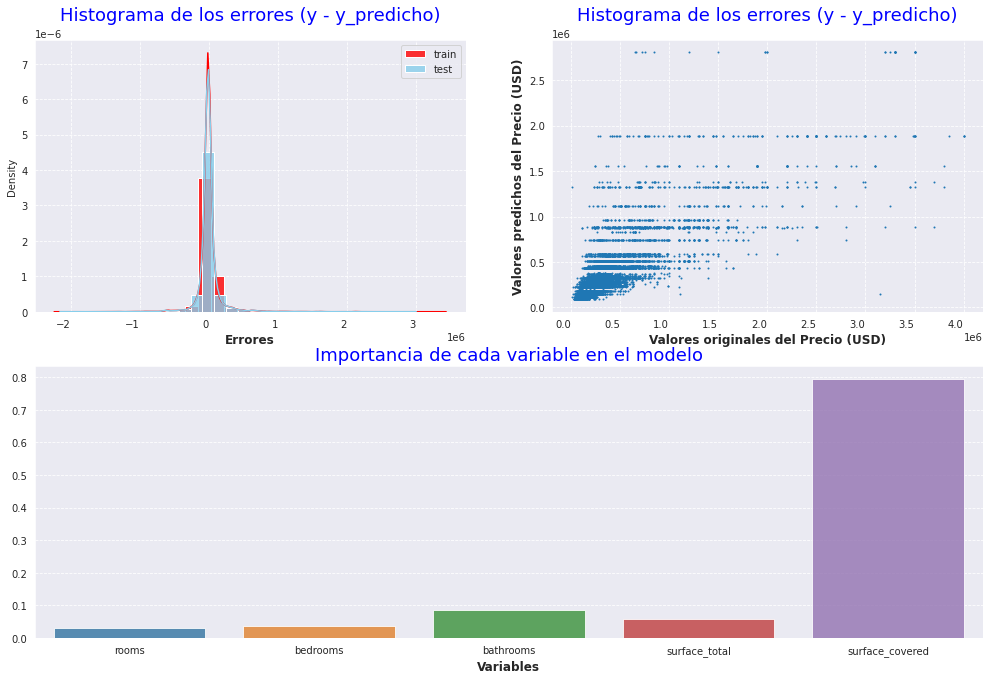

In [81]:
df_arbol = Aplicar_modelo(X_train, X_test, y_train, y_test, Arbol, 
                          descrip = "Arbol", Hparam ="5", Cant_Var = "5",
                   importances = True)

Se puede ver una mejora respecto al Benchmarck. El rmse pasó de ~175000 a ~158000 y el  sin embargo sigue siendo un valor bastante alto. También se puede apreciar una leve mejora en el gráfico de dispersión.

Para tratar de mejorarlo aún más se calculó la profundidad más óptima para el modelo

In [82]:
pd.concat([df_bechnmark, df_arbol])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340


Podemos observar una mejoria respecto al Benchmark, donde el rmse_test pasó de **_~219000_** a **_~174000_** y el R2_test paso de 0.475 a 0.667, sin embargo siguen siendo valores que se pueden mejorar.
Tambien podemos observar, que la variable que de mayor importancia para el modelo es **"surface_cevered"**, con una **_~80%_**.



Probamos el modelo para verificar la profundicar mas optima.

Modelo: Árbol de Decisión


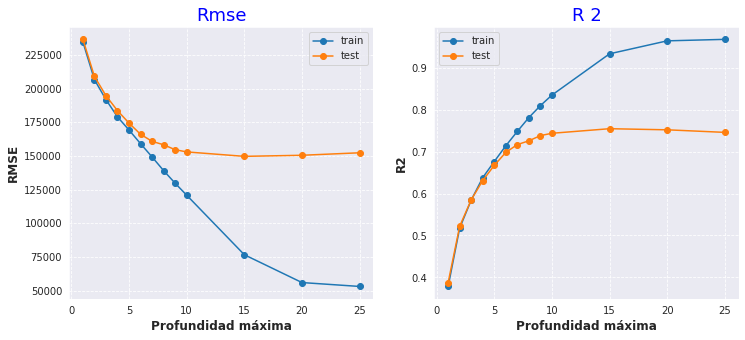

In [83]:
probar_modelos(X_train, X_test, y_train, y_test,
               tree_regressor = True, 
               knn_regressor =False)

Nos decidimos por una profundidad de 6, ya que a profundidades mayores no se encuentra una diferencia significativa, y evitamos el overfiting.

In [84]:
tree_model = DecisionTreeRegressor(max_depth = 6)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 159067.539460302
Raíz del error cuadrático medio en Test: 166034.1200011022
R 2 en Train: 0.714121590545572
R 2 en Test: 0.6983263127587389


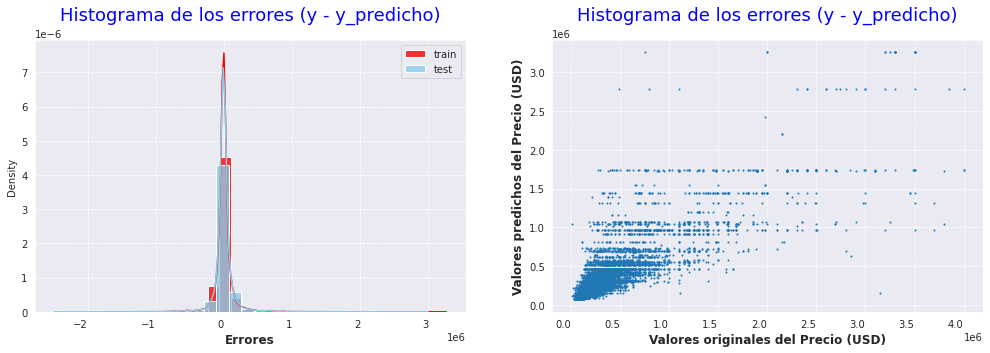

In [85]:
df_arbol_mejorado = Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model, 
                          descrip = "Arbol Mejorado", Hparam ="6", Cant_Var = "5",
                   importances = False)

In [86]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326


Podemos observar la leve mejoría ya mencionada.

#### 3. Vecino más cercano

Realizamos el mismo procedimiento utilizado para el modelo de árbol de decisión pero para el modelo de vecinos más cercanos.

Esta vez probamos primero el modelo para definir la cantidad de vecinos más optima.

Modelo: Vecinos más cercanos


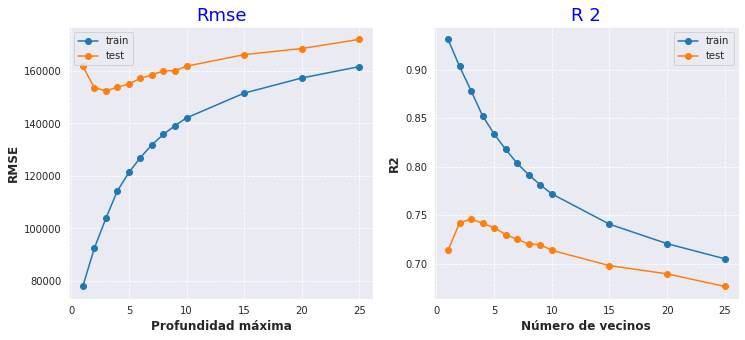

In [87]:
probar_modelos(X_train, X_test, y_train, y_test,
               tree_regressor = False, 
               knn_regressor =True)

Seleccionamos "10" vecinos, ya que se obtienen valores de rmse y R2 en el test muy similares a una cantidad de vecinos igual a "1", pero en este caso se ve una reducción significativa entre los valores obtenidos en el test y el train.

In [88]:
KNN_model = KNeighborsRegressor(n_neighbors = 10)


Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 142074.1381975396
Raíz del error cuadrático medio en Test: 161749.10186897055
R 2 en Train: 0.7719404351192312
R 2 en Test: 0.7136966050304152


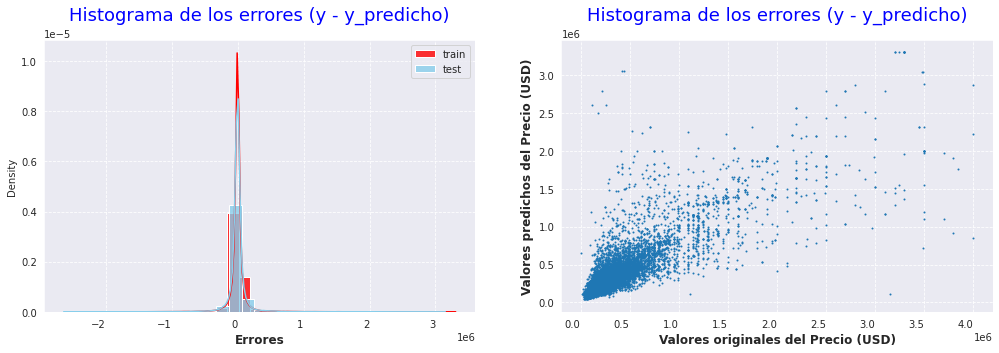

In [89]:
df_KNN = Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model, 
                          descrip = "KNN", Hparam ="10", Cant_Var = "5",
#                    tree_regressor = True,max_depth= 5, #Arbol de decisión 
#                    knn_regressor = True, n_neighbors=5, #Vecino más cercano
                   importances = False) #calculó la importancia de cada variable en el modelo (Arbol)

In [90]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado,df_KNN])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326
0,KNN,KNN,10 Vecinos,5,142074.138198,161749.101869,0.771940,0.713697


Comparando los valores de R" y rmse en el testeo con "Árbol Mejorado", se logra una leve mejoría con el modelo de KNN.
Además, observamos una menor dispersión en el gráfico.

#### 4. Arbol con longitud y latitud
Agregando las columnas longitud (***"lon"***) y latitud (***"lat"***)

In [91]:
df_ml2 = df.loc[(df.l2 == 'Capital Federal') 
            & ((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento')) 
            & (df.surface_total <= 1000) & (df.surface_total >= 15) & (df.price <= 4000000),
              ("lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price")]
df_ml2 = df_ml2.dropna()
df_ml2.shape

(76771, 8)

In [92]:
X = df_ml2[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]

y = df_ml2["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [139]:
df_ml2.shape

(76771, 8)

Probamos los datos con ambos modelos, KNN y Árbol de decisión. y nos decidimos por el que obtenga mejores resultados.

Modelo: Árbol de Decisión


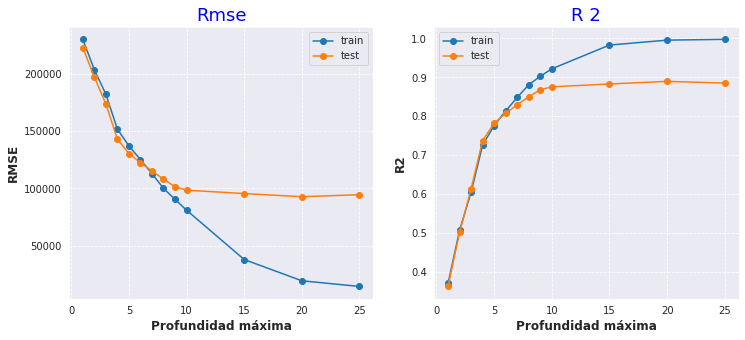

Modelo: Vecinos más cercanos


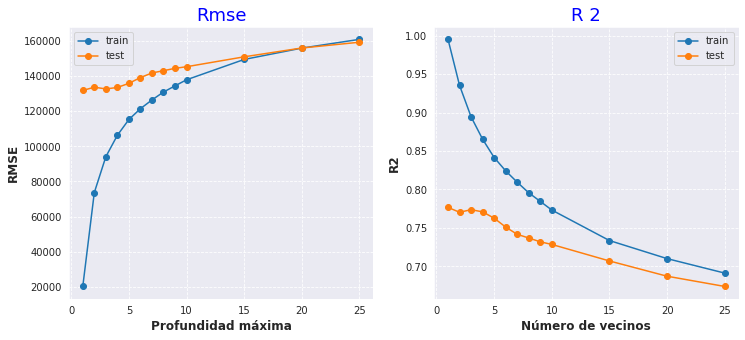

In [93]:
probar_modelos(X_train, X_test, y_train, y_test,
               tree_regressor = True, 
               knn_regressor =True)

Nos decidimos por el modelo de "Árbol de decisión" con una profundidad de "9".

In [94]:
tree_con_latitud = DecisionTreeRegressor(max_depth = 9,random_state = 42)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 90406.9991596731
Raíz del error cuadrático medio en Test: 101347.23797565265
R 2 en Train: 0.9025350981246945
R 2 en Test: 0.8679645647818333


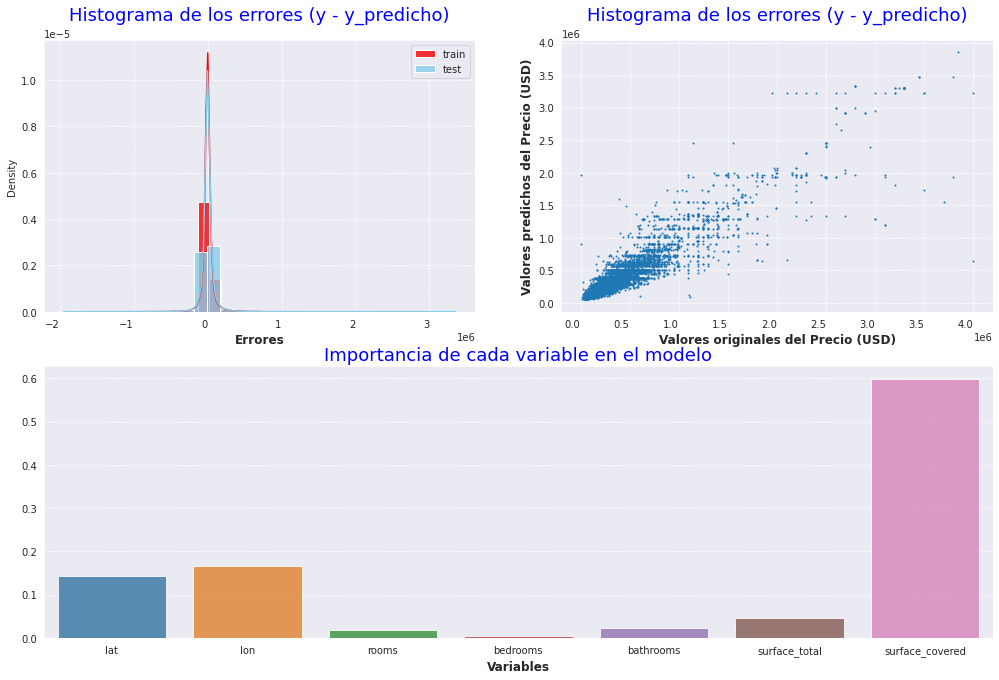

In [95]:
df_Arbol_con_latitud = Aplicar_modelo(X_train, X_test, y_train, y_test, tree_con_latitud, 
                          descrip = "Arbol con lat-lon", Hparam ="9", Cant_Var = "7",
                   importances = True)

In [96]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado,df_KNN,df_Arbol_con_latitud])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326
0,KNN,KNN,10 Vecinos,5,142074.138198,161749.101869,0.771940,0.713697
0,Arbol con lat-lon,Árbol,Profundidad 9,7,90406.999160,101347.237976,0.902535,0.867965


Agregando al modelos las la variables de ubicación geográfica, se obtiene una mejoría significativa en los valores de rmse y R2 respecto a los valores anteriores. 
Además podemos observar que las variables de **"lat"** y **"lon"** pasan a estar en la ***2da*** y ***3ra*** posición de importancia para el modelo.

#### 5. Árbol con tipo de propiedad

Agregamos la categoría de tipo de propiedad (**"property_type"**) al modelo.

In [97]:
df_ml3 = df.loc[(df.l2 == 'Capital Federal') 
            & ((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento')) 
            & (df.surface_total <= 1000) & (df.surface_total >= 15) & (df.price <= 4000000),
              ("lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","property_type")]
df_ml3 = df_ml3.dropna()
df_ml3.shape

(76771, 9)

Debemos transformar la **"property_type"**, para eso usaremos **OrdinalEncoder**.

In [98]:
# df.head()
# print(df.l3.value_counts())
# df.l3.value_counts().iloc[:].index.tolist()

In [99]:
df_ml3.property_type.value_counts()

Departamento    65329
PH               9334
Casa             2108
Name: property_type, dtype: int64

In [100]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Casa','PH', 'Departamento']])

encoder.fit(df_ml3[["property_type"]])
df_ml3["property_type-encoded"] = encoder.transform(df_ml3[["property_type"]])

In [101]:
df_ml3.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type-encoded
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,2.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,1.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,1.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,1.0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,1.0


In [102]:
X = df_ml3[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "property_type-encoded"]]

y = df_ml3["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Modelo: Árbol de Decisión


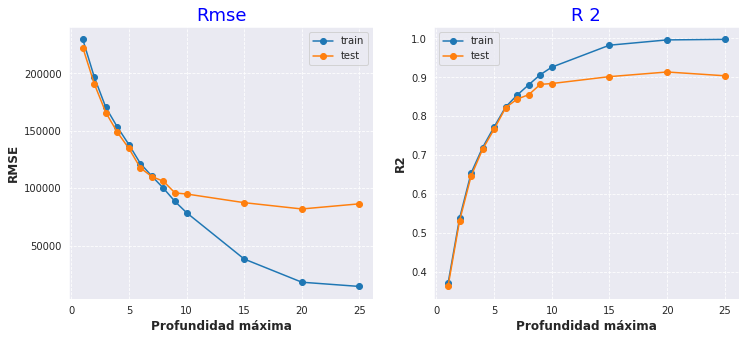

Modelo: Vecinos más cercanos


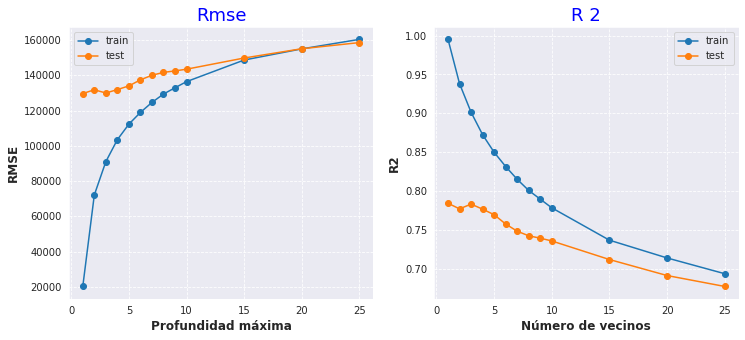

In [103]:
probar_modelos(X_train, X_test, y_train, y_test,
               tree_regressor = True, 
               knn_regressor =True)

In [104]:
tree_con_type = DecisionTreeRegressor(max_depth = 7, random_state = 42)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 110449.18827625434
Raíz del error cuadrático medio en Test: 110078.2071067842
R 2 en Train: 0.8545314203081521
R 2 en Test: 0.8442351857770872


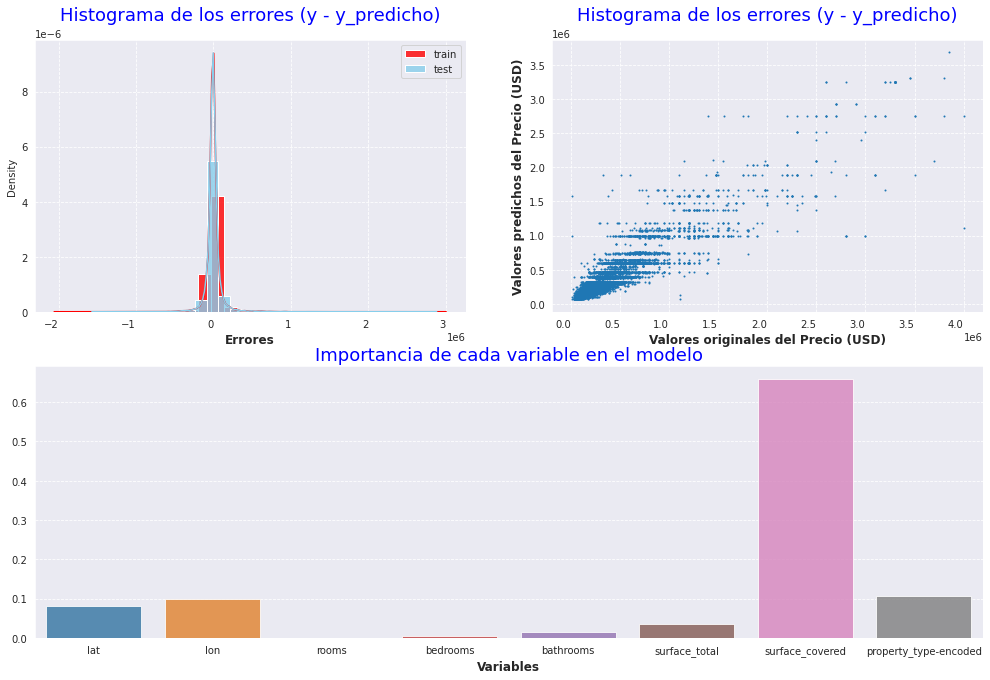

In [105]:
df_Arbol_con_tipo_de_propiedad = Aplicar_modelo(X_train, X_test, y_train, y_test, tree_con_type, 
                          descrip = "Arbol con Type", Hparam ="9", Cant_Var = "8",
                   importances = True) 

In [106]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado,df_KNN,df_Arbol_con_latitud,df_Arbol_con_tipo_de_propiedad])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326
0,KNN,KNN,10 Vecinos,5,142074.138198,161749.101869,0.771940,0.713697
0,Arbol con lat-lon,Árbol,Profundidad 9,7,90406.999160,101347.237976,0.902535,0.867965
0,Arbol con Type,Árbol,Profundidad 9,8,110449.188276,110078.207107,0.854531,0.844235


#### 6. Arbol con categoria de barrios (l3)
agregamos barrio

In [107]:
df_ml4 = df.loc[(df.l2 == 'Capital Federal') 
            & ((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento')) 
            & (df.surface_total <= 1000) & (df.surface_total >= 15) & (df.price <= 4000000),
              ("lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","property_type","l3")]
df_ml4 = df_ml4.dropna()
df_ml4.shape

(76771, 10)

In [108]:
df_ml4.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,San Cristobal
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo


In [109]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Casa','PH', 'Departamento']])
encoder.fit(df_ml4[["property_type"]])
df_ml4["property_type-encoded"] = encoder.transform(df_ml4[["property_type"]])

encoder = OrdinalEncoder(categories=[df_ml4.l3.value_counts().iloc[:].index])
encoder.fit(df_ml4[["l3"]])
df_ml4["l3-encoded"] = encoder.transform(df_ml4[["l3"]])


df_ml4.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3,property_type-encoded,l3-encoded
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,San Cristobal,2.0,18.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Boedo,1.0,21.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Palermo,1.0,0.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Palermo,1.0,0.0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Villa Crespo,1.0,2.0


In [138]:
df_ml4.shape

(76771, 12)

In [110]:
X = df_ml4[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total",
            "surface_covered", "property_type-encoded","l3-encoded"]]

y = df_ml4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Modelo: Árbol de Decisión


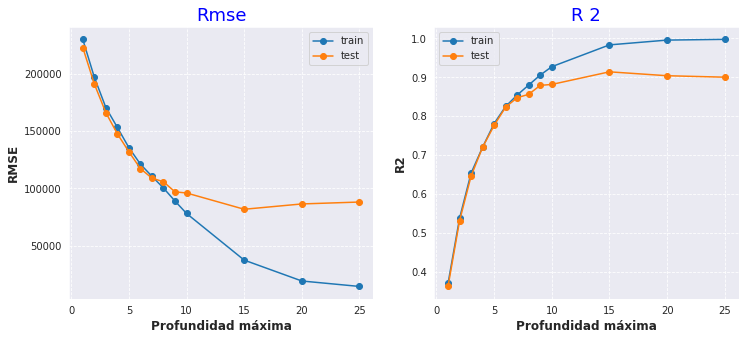

Modelo: Vecinos más cercanos


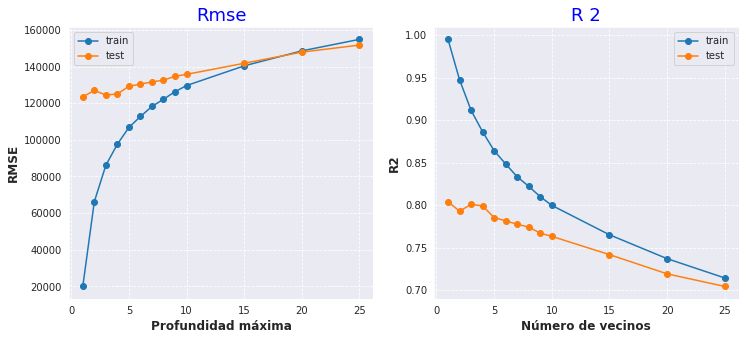

In [111]:
probar_modelos(X_train, X_test, y_train, y_test,
               tree_regressor = True, 
               knn_regressor =True)

In [112]:
tree_con_type_l3 = DecisionTreeRegressor(max_depth = 9)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 88883.26733373378
Raíz del error cuadrático medio en Test: 98434.89435075104
R 2 en Train: 0.905792785411837
R 2 en Test: 0.8754439504272878


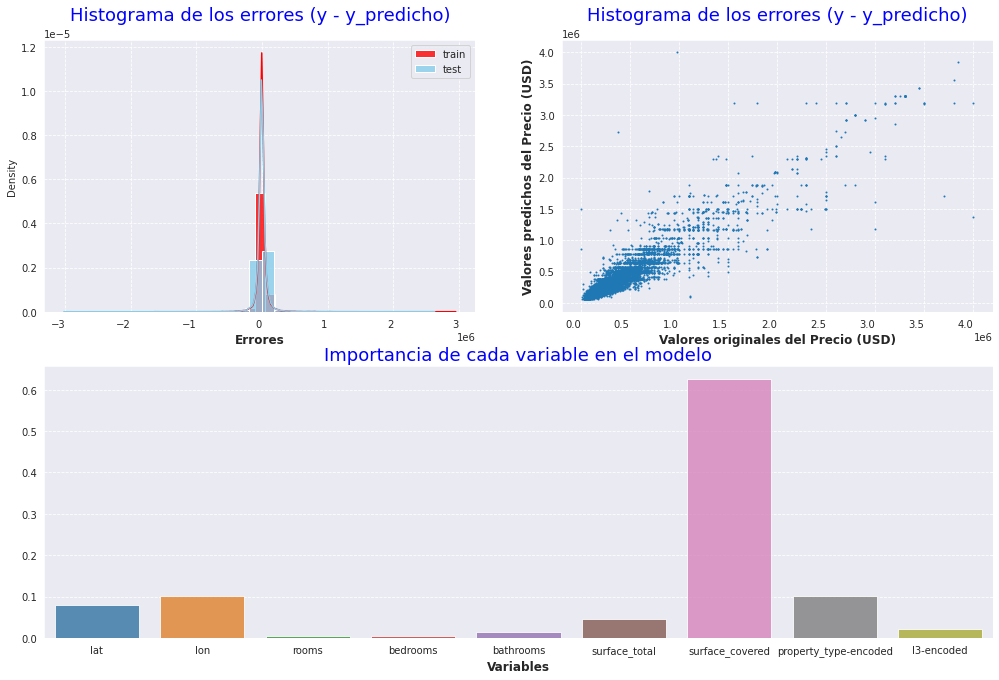

In [113]:
df_Arbol_con_tipo_y_barrio = Aplicar_modelo(X_train, X_test, y_train, y_test, tree_con_type_l3, 
                          descrip = "Arbol con tipo y barrio", Hparam ="9", Cant_Var = "9",
#                    tree_regressor = True,max_depth= 5, #Arbol de decisión 
#                    knn_regressor = True, n_neighbors=5, #Vecino más cercano
                   importances = True) #calculó la importancia de cada variable en el modelo (Arbol)

In [114]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado,df_KNN,df_Arbol_con_latitud,
           df_Arbol_con_tipo_de_propiedad,df_Arbol_con_tipo_y_barrio])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326
0,KNN,KNN,10 Vecinos,5,142074.138198,161749.101869,0.771940,0.713697
0,Arbol con lat-lon,Árbol,Profundidad 9,7,90406.999160,101347.237976,0.902535,0.867965
0,Arbol con Type,Árbol,Profundidad 9,8,110449.188276,110078.207107,0.854531,0.844235
0,Arbol con tipo y barrio,Árbol,Profundidad 9,9,88883.267334,98434.894351,0.905793,0.875444


Podemos apreciar que agregando los barrios (**"l3"**) no se observa mejoría en el modelo.
Debido a esto nos quedamos con el modelo **"Arbol con Type"** como el mejor modelo obtenido.

#### 7. Probamos el modelo con nuevas instancias.

Por ultimo vamos a probar el modelo seleccionado con instancias distintas a las del modelo.
para esto utilizaremos un dataset obtenido de la siguiente página:

https://data.buenosaires.gob.ar/dataset/departamentos-venta/resource/14daa260-29e6-4870-99f0-81884ee901ac

Se utilizo el dataset del 2019 ya que es el periodo que más se asemeja al del dataset original.

In [115]:
# instancias = pd.read_excel('datos/Departamentos_venta_2019.dbf.xlsx', 'Departamentos_venta_2019', engine='openpyxl')

instancias = pd.read_excel('/content/gdrive/MyDrive/datos/Departamentos_venta_2019.dbf.xlsx', 'Departamentos_venta_2019', engine='openpyxl')
instancias.shape

(88640, 19)

In [116]:
instancias.head()

,OPERACION,TIPO,ANTIG,AGE,M2TOTAL,M2CUB,AMBIENTES,BANOS,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS_1,COMUNAS,MES,LATITUD,LONGITUD
0,VTA,DTO,0,EST,20,20,1,1,Leiva al 4000,43.74,52000,2274480,2600,113724.0,CHACARITA,15,JUNIO,-34.590172,-58.448564
1,VTA,DTO,0,EST,58,50,2,1,Colegiales,43.74,140693,6153911,2813,123041.0,CHACARITA,15,JUNIO,-34.579163,-58.455725
2,VTA,DTO,0,EST,36,34,1,1,Leiva 4345 4 B,43.74,85000,3717900,2500,109350.0,CHACARITA,15,JUNIO,-34.593388,-58.451140
3,VTA,DTO,0,EST,24,22,1,1,Paysandu 1970,43.74,68900,3013686,3131,136950.0,PATERNAL,15,JUNIO,-34.602092,-58.457795
4,VTA,DTO,0,EST,45,45,2,1,Avenida Estado DE Israel al 4600,43.74,199999,8747956,4444,194381.0,VILLA CRESPO,15,JUNIO,-34.600259,-58.430658


In [117]:
instancias.TIPO.value_counts()

DTO         88615
EDIFICIO       25
Name: TIPO, dtype: int64

In [118]:
instancias.loc[ instancias.TIPO == 'DTO', 'TIPO'] = 'Departamento'

nos quedamos con TIPO M2TOTAL M2CUB AMBIENTES BAÑOS PRECIOUSD LATITUD LONGITUD

In [119]:
instancias.rename(columns={'TIPO':"property_type",
                        'M2TOTAL':'surface_total',
                        'M2CUB':'surface_covered',
                       'AMBIENTES':"rooms",
                       'BANOS':"bathrooms",
                       'PRECIOUSD':"price",
                       'LATITUD':"lat",
                       'LONGITUD':"lon"},
               
               inplace=True)

# X = df_ml2[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]

# y = df_ml2["price"]

# M2TOTAL	M2CUB	AMBIENTES	BANOS		PRECIOUSD LATITUD	LONGITUD

In [120]:
instancias_limpias = instancias.loc[((instancias.property_type == 'PH')|(instancias.property_type == 'Casa')|(instancias.property_type == 'Departamento')) 
            & (instancias.surface_total <= 1000) & (instancias.surface_total >= 15) & (instancias.price <= 4000000) 
            & (instancias.rooms <= 26) & (instancias.rooms >= instancias.bathrooms),
              ("lat", "lon", "rooms", "bathrooms", "surface_total", "surface_covered", "price","property_type")]
instancias_limpias = instancias_limpias.dropna()
instancias_limpias.shape

(85537, 8)

In [121]:
instancias_limpias.isnull().sum()

lat                0
lon                0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [122]:
instancias_limpias = instancias_limpias.replace(0, np.nan)
instancias_limpias.lat.value_counts()
instancias_limpias = instancias_limpias.dropna()
instancias_limpias.shape

(73153, 8)

In [123]:
instancias_limpias.loc[:,'rooms':'price'].describe(percentiles = [.005, .25, .5, .7, 0.995])

,rooms,bathrooms,surface_total,surface_covered,price
count,73153.000000,73153.000000,73153.000000,73153.000000,7.315300e+04
mean,2.668462,1.428403,80.724550,71.951226,2.516604e+05
std,1.247067,0.740990,61.622112,53.725893,2.850168e+05
min,1.000000,1.000000,15.000000,1.000000,9.000000e+03
0.5%,1.000000,1.000000,21.000000,20.000000,5.264592e+04
25%,2.000000,1.000000,43.000000,40.000000,1.157000e+05
50%,3.000000,1.000000,62.000000,56.000000,1.650000e+05
70%,3.000000,2.000000,85.000000,76.000000,2.420000e+05
99.5%,7.000000,4.000000,396.240000,349.000000,1.980000e+06
max,21.000000,10.000000,1000.000000,1118.000000,4.000000e+06


In [124]:
# df_ml3 = df.loc[(df.l2 == 'Capital Federal') 
#             & ((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento')) 
#             & (df.surface_total <= 1000) & (df.surface_total >= 15) & (df.price <= 4000000),
#               ("lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","property_type")]
# df_ml3 = df_ml3.dropna()
# df_ml3.shape

In [125]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Casa','PH', 'Departamento']])

encoder.fit(instancias_limpias[["property_type"]])
instancias_limpias["property_type-encoded"] = encoder.transform(instancias_limpias[["property_type"]])

In [126]:
instancias_limpias.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,property_type,property_type-encoded
0,-34.590172,-58.448564,1.0,1.0,20,20.0,52000,Departamento,2.0
1,-34.579163,-58.455725,2.0,1.0,58,50.0,140693,Departamento,2.0
2,-34.593388,-58.451140,1.0,1.0,36,34.0,85000,Departamento,2.0
3,-34.602092,-58.457795,1.0,1.0,24,22.0,68900,Departamento,2.0
4,-34.600259,-58.430658,2.0,1.0,45,45.0,199999,Departamento,2.0


In [127]:
X_instancias = instancias_limpias[["lat", "lon", "rooms", "bathrooms", "surface_total", "surface_covered", "property_type-encoded"]]

y_instancias = instancias_limpias["price"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Debemos descartar la cantidad de baños, en el modelo de ya que en los datos obtenidos dicha información no está expresada.

In [128]:
X = df_ml3[["lat", "lon", "rooms", "bathrooms", "surface_total", "surface_covered", "property_type-encoded"]]

y = df_ml3["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [129]:
tree_con_type = DecisionTreeRegressor(max_depth = 9)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 89562.49741524368
Raíz del error cuadrático medio en Test: 100515.77668353391
R 2 en Train: 0.9043474544773853
R 2 en Test: 0.8701221375763109


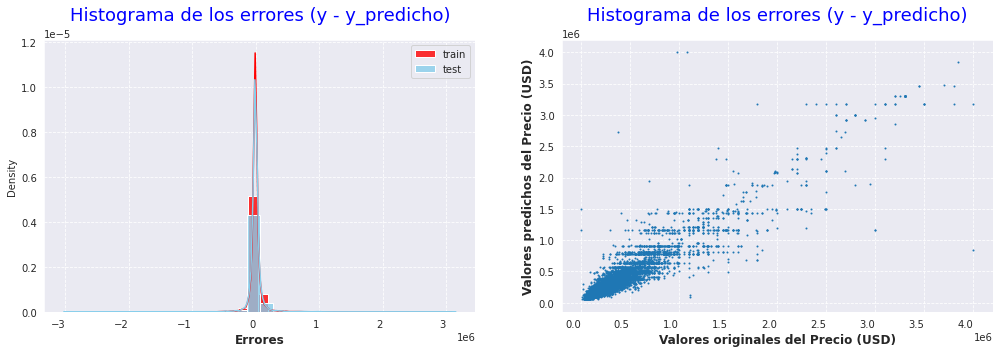

In [130]:
df_sin_baños = Aplicar_modelo(X_train, X_test, y_train, y_test, tree_con_latitud, 
                          descrip = "Arbol sin cant. de baños", Hparam ="9", Cant_Var = "7",
                   importances = False)

In [131]:
pd.concat([df_bechnmark, df_arbol,df_arbol_mejorado,df_KNN,df_Arbol_con_latitud,
           df_Arbol_con_tipo_de_propiedad,df_Arbol_con_tipo_y_barrio,df_sin_baños ])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol,Árbol,Profundidad 5,5,169200.175412,174352.736738,0.676541,0.667340
0,Arbol Mejorado,Árbol,Profundidad 6,5,159067.539460,166034.120001,0.714122,0.698326
0,KNN,KNN,10 Vecinos,5,142074.138198,161749.101869,0.771940,0.713697
0,Arbol con lat-lon,Árbol,Profundidad 9,7,90406.999160,101347.237976,0.902535,0.867965
0,Arbol con Type,Árbol,Profundidad 9,8,110449.188276,110078.207107,0.854531,0.844235
0,Arbol con tipo y barrio,Árbol,Profundidad 9,9,88883.267334,98434.894351,0.905793,0.875444
0,Arbol sin cant. de baños,Árbol,Profundidad 9,7,89562.497415,100515.776684,0.904347,0.870122


Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 89562.49741524368
Raíz del error cuadrático medio en New: 117091.05948498195
R 2 en Train: 0.9043474544773853
R 2 en New: 0.8312232883355217


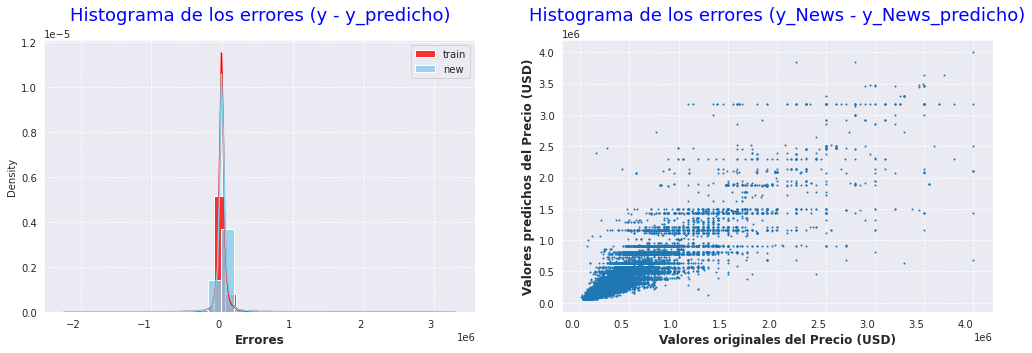

In [132]:
Probando_instancias = Probar_nuevas_instancias_al_modelo(X_train, X_instancias, y_train, y_instancias, tree_con_type, 
                                                         descrip = "Probando instancias", Hparam ="9", Cant_Var = "8", 
                                                         importances = False)

In [133]:
Probando_instancias

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_new,R2_train,R2_new
0,Probando instancias,Árbol,Profundidad 9,8,89562.497415,117091.059485,0.904347,0.831223


Podemos observar que los valores de rmse y R2 obtenidos por los nuevos datos son bastante buenos. 

### Conclusión

Para concluir, podríamos decir que el modelo que mejor se adapta a la problemática planteada, es el obtenido de utilizar las variables de "lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered","property_type", el cual denominamos "Arbol con Type".

In [134]:
pd.concat([df_bechnmark,df_Arbol_con_tipo_de_propiedad])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Benchmar,LinearRegression,,2,216278.717594,218957.054218,0.471499,0.475361
0,Arbol con Type,Árbol,Profundidad 9,8,110449.188276,110078.207107,0.854531,0.844235


Donde obtuvimos valor de R2 ***0.8818***, una mejoría de ***~85%***  modelo Benchmark. de igual manera los valores obtenidos del rmse siguen siendo bastante altos, por lo que para futuros modelo se aconseja tomar en cuenta variables como la antigüedad del apartamento.

Por otro lado, se probó el mejor modelo obtenido con nuevas instancias, para esto se debió eliminar la variable **"bathrooms"**, ya que esta no se encontraba en los nuevos datos.
Donde la variacion entre el mejor modelo odtenido y este, es minima.

In [135]:
pd.concat([df_Arbol_con_tipo_de_propiedad,df_sin_baños ])

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_test,R2_train,R2_test
0,Arbol con Type,Árbol,Profundidad 9,8,110449.188276,110078.207107,0.854531,0.844235
0,Arbol sin cant. de baños,Árbol,Profundidad 9,7,89562.497415,100515.776684,0.904347,0.870122


In [136]:
Probando_instancias

,Descripción,Modelo,Hparam,Cant_Var,rmse_train,rmse_new,R2_train,R2_new
0,Probando instancias,Árbol,Profundidad 9,8,89562.497415,117091.059485,0.904347,0.831223


Del total de ***73153*** nuevos datos probados de obtuvo un R2 de ***0.8312***, lo cual representa una disminución de un ***~5.5%*** respecto a los datos testeados del modelo, esto demuestra que le modelo se adapta muy bien a los a las nuevas instancias obtenidas.

### Estudiando los datos para el desafío

In [137]:

df_desafio_ar = pd.read_csv('datos/ar_properties.csv')
df_desafio_uy = pd.read_csv('datos/uy_properties.csv')
df_desafio_co = pd.read_csv('datos/co_properties.csv')
df_desafio_ec = pd.read_csv('datos/ec_properties.csv')
df_desafio_pe = pd.read_csv('datos/pe_properties.csv')


FileNotFoundError: ignored

In [ ]:
# df_desafio_ar.shape
# df_desafio_uy.shape
df_desafio_co.shape
# df_desafio_ec.shape
# df_desafio_pe.shape

In [ ]:
.isnull().sum()

In [ ]:
df_desafio_co.groupby('l2')['l3'].nunique()

In [ ]:

plt.figure(figsize=(20,5))
sns.countplot(data= df_desafio_co.loc[(df_desafio_co.l3 == 'Bogotá D.C')],
                x = 'l4',
             order = df_desafio_co.loc[(df_desafio_co.l3 == 'Bogotá D.C')].l4.value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de propiedad')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

# df_desafio_co.loc[(df_desafio_co.l2 == 'Cundinamarca')].l3.value_counts().index

# 'Bogotá D.C'

# df_desafio_co.loc[(df_desafio_co.l3 == 'Bogotá D.C')].l4.value_counts().index

In [ ]:

plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(data= df_desafio_co,
                x= 'property_type',
             order = df_desafio_co.loc[: , :].property_type.value_counts()[:].index)
plt.title('Detalle de las propedades incluidas en la categoria "Otras"',fontsize=18)
plt.ylabel('Cantidad', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
for i, v in enumerate(df_desafio_co.loc[: , :].property_type.value_counts()[:].to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom')

plt.show()


In [ ]:
print(df_desafio_uy.groupby('l2')['l3'].nunique())
df_desafio_uy.loc[(df_desafio_uy.l2 == 'Montevideo')].l3.value_counts().index

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data= df_desafio_uy.loc[(df_desafio_uy.l2 == 'Montevideo')],
                x = 'l3',
             order = df_desafio_uy.loc[(df_desafio_uy.l2 == 'Montevideo')].l3.value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de propiedad')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(data= df_desafio_uy,
                x= 'property_type',
             order = df_desafio_uy.loc[: , :].property_type.value_counts()[:].index)
plt.title('Detalle de las propedades incluidas en la categoria "Otras"',fontsize=18)
plt.ylabel('Cantidad', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
for i, v in enumerate(df_desafio_uy.loc[: , :].property_type.value_counts()[:].to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom')

plt.show()


In [ ]:
df_desafio_ec.groupby('l2')['l3'].nunique()
df_desafio_ec.loc[(df_desafio_ec.l2 == 'Pichincha')].l3.value_counts().index

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data= df_desafio_ec.loc[(df_desafio_ec.l3 == 'Quito')],
                x = 'l4',
             order = df_desafio_ec.loc[(df_desafio_ec.l3 == 'Quito')].l4.value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de propiedad')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(data= df_desafio_ec,
                x= 'property_type',
             order = df_desafio_ec.loc[: , :].property_type.value_counts()[:].index)
plt.title('Detalle de las propedades incluidas en la categoria "Otras"',fontsize=18)
plt.ylabel('Cantidad', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
for i, v in enumerate(df_desafio_ec.loc[: , :].property_type.value_counts()[:].to_numpy()):
    plt.text(i, v, str(v), fontweight='bold' ,ha='center', va='bottom')

plt.show()


In [ ]:
df_desafio_pe.groupby('l2')['l3'].nunique()
# df_desafio_pe.loc[(df_desafio_pe.l2 == 'Pichincha')].l3.value_counts().index

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data= df_desafio_pe.loc[(df_desafio_pe.l3 == 'Lima')],
                x = 'l4',
             order = df_desafio_pe.loc[(df_desafio_pe.l3 == 'Lima')].l4.value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de propiedad')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### Tranformación de Datos

#### 1. Eleccion de las tranformaciondes a ulizar.
